# ANÁLISIS EXPLORATORIO DE DATOS DEL CONTROL DE CALIDAD EN DESPACHO DE PULPAS DE FRUTA CONCENTRADA EN TAMBORES DE 250 KG Y TOTES DE 100 KG BAJO LA NORMA CHILENA 44

# ALUMNO: WITMAN ZAVALA M.

# INTRODUCCIÓN

El presente trabajo desarrolla un Análisis Exploratorio de Datos (EDA) sobre registros históricos de control de calidad en el proceso de preparación y despacho de pulpas de fruta concentrada, en formatos de tambores de 250 kg y totes de 100 kg, bajo la aplicación de la Norma Chilena 44.

Los datos analizados provienen del registro operativo, el cual es completado diariamente por los analistas de calidad durante la ejecución del proceso de despacho, combinando información levantada en terreno, en tiempo real, con datos obtenidos desde el sistema SAP, tales como pedidos, packing list y observaciones de planta. Esta integración permite una trazabilidad completa del producto, desde su revisión hasta la decisión final de despacho.

El conjunto de datos contiene información relacionada con volumen de carga, muestreo según norma, defectos interiores y exteriores, acciones correctivas aplicadas y resultado final del proceso. En particular, la variable “Destino” constituye un elemento clave del análisis, ya que representa la decisión final de calidad, clasificando cada registro en categorías como producto liberado para despacho o producto destinado a decomiso, reflejando directamente el cumplimiento de los criterios sanitarios y operativos establecidos.

El objetivo de este EDA es comprender la estructura, calidad y comportamiento de los datos, identificar patrones y relaciones relevantes entre las variables, detectar posibles inconsistencias y generar una base sólida para etapas posteriores de análisis avanzado y modelamiento predictivo, orientadas a apoyar la toma de decisiones y la mejora continua del proceso de control de calidad en despacho.

# PASO 1 — IMPORTACIÓN Y CONFIGURACIÓN DEL ENTORNO

In [34]:
# ============================================================
# PASO 1 | IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN GENERAL
# ============================================================

import pandas as pd                      # Manipulación y análisis de datos
import numpy as np                      # Operaciones numéricas
import requests                         # Descarga de archivos desde la web
import io                               # Manejo de datos en memoria
import matplotlib.pyplot as plt          # Gráficos base
import seaborn as sns                   # Gráficos estadísticos
from tabulate import tabulate            # Tablas formateadas en consola

# -----------------------------
# CONFIGURACIÓN VISUAL GLOBAL
# -----------------------------
sns.set_theme(
    style="whitegrid",                  # Fondo claro con grilla suave
    context="notebook"                  # Tamaños adecuados para análisis
)

plt.rcParams["figure.figsize"] = (10, 5)   # Tamaño estándar de gráficos
plt.rcParams["axes.titlesize"] = 14        # Tamaño del título
plt.rcParams["axes.labelsize"] = 12        # Tamaño de etiquetas


# PASO 2 — CARGA DE DATOS Y VALIDACIÓN INICIAL

In [35]:
# ============================================================
# PASO 2 | CARGA DE DATOS DESDE GOOGLE SHEETS
# ============================================================

# URL directa para exportar el archivo Excel desde Google Sheets
file_url = (
    "https://docs.google.com/spreadsheets/d/"
    "1Jwrs_Ggu8WP3I866osi7szwEU3Ak4bHh/export?format=xlsx"
)

# -----------------------------
# DESCARGA DEL ARCHIVO
# -----------------------------
response = requests.get(file_url)        # Solicitud HTTP al servidor
response.raise_for_status()              # Verifica que la descarga fue exitosa

# -----------------------------
# LECTURA DEL EXCEL EN MEMORIA
# -----------------------------
df = pd.read_excel(
    io.BytesIO(response.content),        # Contenido leído desde memoria
    skiprows=3,                          # Datos reales comienzan en fila 4
    engine="openpyxl"                    # Motor para archivos .xlsx
)

# -----------------------------
# VALIDACIÓN INICIAL DEL DATASET
# -----------------------------
print("✅ Dataset cargado correctamente\n")

print("📐 Dimensiones del dataset:")
print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}\n")

print("📌 Tipos de datos iniciales:")
df.info()



✅ Dataset cargado correctamente

📐 Dimensiones del dataset:
Filas: 41232 | Columnas: 28

📌 Tipos de datos iniciales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41232 entries, 0 to 41231
Data columns (total 28 columns):
 #   Column                                                                   Non-Null Count  Dtype         
---  ------                                                                   --------------  -----         
 0   Fecha de la Revisión                                                     41227 non-null  datetime64[ns]
 1   Nombre de Producto                                                       41227 non-null  object        
 2   Cliente                                                                  41227 non-null  object        
 3   Packing list                                                             41227 non-null  object        
 4   N° Pedido                                                                41143 non-null  object        
 5   Peso t

# PASO 3 — LIMPIEZA ESTRUCTURAL BÁSICA

In [36]:
# ============================================================
# PASO 3 | LIMPIEZA ESTRUCTURAL BÁSICA
# ============================================================

# -----------------------------
# ELIMINAR FILAS VACÍAS
# -----------------------------
df = df.dropna(how="all")                # Elimina filas completamente vacías

# -----------------------------
# ELIMINAR COLUMNAS VACÍAS
# -----------------------------
df = df.dropna(axis=1, how="all")         # Elimina columnas completamente vacías

# -----------------------------
# ELIMINAR DUPLICADOS
# -----------------------------
df = df.drop_duplicates()                # Elimina registros duplicados

# -----------------------------
# REINICIAR ÍNDICE
# -----------------------------
df = df.reset_index(drop=True)            # Reordena el índice desde 0

# -----------------------------
# VALIDACIÓN POST-LIMPIEZA
# -----------------------------
print("✅ Limpieza estructural completada\n")

print("📐 Dimensiones después de la limpieza:")
print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}\n")

print("🔍 Vista previa después de la limpieza:")
df.head()


✅ Limpieza estructural completada

📐 Dimensiones después de la limpieza:
Filas: 41220 | Columnas: 28

🔍 Vista previa después de la limpieza:


,Fecha de la Revisión,Nombre de Producto,Cliente,Packing list,N° Pedido,Peso total / Kg,Total tambores /Totes,\nTotal tambores según NormaCh44 / totes a revisar según Norma,Total tambores con defecto exterior (no revisado por norma),Total Tambores/tote con defectos revisados por norma y defecto exterior,...,Linea,CODIGO SAP,Fecha Envasado,Kilos,FECHA BASE FIFO,PROVEEDOR TAMBOR,Analista que preparación,Fecha despacho,Analista que despacha,Observacion
0,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164244,44824096,0.0,0.0,0.0,0.0,0.0,...,5.0,NaN,2023-05-04 00:00:00,239.0,NaN,NaN,J. ESPINOZA,2024-10-01,O. CASTRO,ABOLLADO REPARADO
1,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164244,44824096,0.0,0.0,0.0,0.0,0.0,...,5.0,NaN,2023-05-04 00:00:00,241.0,NaN,NaN,J. ESPINOZA,2024-10-01,O. CASTRO,ABOLLADO REPARADO
2,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164238,44824096,0.0,0.0,0.0,0.0,0.0,...,2.0,NaN,2023-06-05 00:00:00,239.0,NaN,NaN,C. ROJAS,2024-10-01,O. CASTRO,NaN
3,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164236,44824096,19122.0,80.0,13.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,J. ESPINOZA,2024-10-01,O. CASTRO,NaN
4,2024-09-25,"PASTA TOMATE HB 30/32 NTSS 1,0 MM 55GAL",RPB S.A.,2002168387,46044675,25076.0,104.0,104.0,19.0,27.0,...,8.0,NaN,2024-04-19 00:00:00,248.0,NaN,NaN,R. KITTSTEINER,2024-10-01,P. ARAVENA,NaN


# PASO 4 — LIMPIEZA SEMÁNTICA DEL DATASET

In [37]:
# ============================================================
# PASO 4 | LIMPIEZA SEMÁNTICA DEL DATASET (VERSIÓN FINAL)
# ============================================================

def limpiar_dataset(df):                                   # Define una función para limpiar el DataFrame
    """
    Limpia y estandariza el DataFrame:
    - Normaliza nombres de columnas
    - Convierte fechas y numéricos
    - Elimina columnas irrelevantes
    - Imputa valores lógicos
    - Convierte 'destino' a binaria
    - Deja 'destino' como última columna
    """

    df = df.copy()                                         # Crea una copia para no modificar el dataset original

    # -----------------------------
    # LIMPIEZA DE NOMBRES DE COLUMNAS
    # -----------------------------
    df.columns = (
        df.columns
          .str.strip()                                     # Elimina espacios al inicio y final
          .str.lower()                                     # Convierte nombres a minúsculas
          .str.replace(r'[^\w\s]', '', regex=True)         # Elimina símbolos especiales
          .str.replace(' ', '_')                           # Reemplaza espacios por guiones bajos
    )

    # -----------------------------
    # CONVERSIÓN DE COLUMNAS FECHA
    # -----------------------------
    columnas_fecha = [                                     # Lista de columnas que deberían ser fechas
        'fecha_de_la_revisin',
        'fecha_envasado',
        'fecha_despacho'
    ]

    for col in columnas_fecha:                             # Recorre cada columna de fecha
        if col in df.columns:                              # Verifica que la columna exista
            df[col] = pd.to_datetime(df[col], errors='coerce')  # Convierte a fecha, errores → NaT

    # -----------------------------
    # CONVERSIÓN DE COLUMNAS NUMÉRICAS
    # -----------------------------
    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns  # Detecta columnas numéricas
    df[columnas_numericas] = df[columnas_numericas].apply(
        pd.to_numeric, errors='coerce'                     # Fuerza valores numéricos, errores → NaN
    )

    # -----------------------------
    # IMPUTACIÓN LÓGICA DE VALORES FALTANTES
    # -----------------------------
    if 'total_tambores_doble_uso' in df.columns:           # Verifica si la columna existe
        df['total_tambores_doble_uso'] = (
            df['total_tambores_doble_uso']
            .fillna(0)                                     # Asume 0 cuando no hay información
            .astype(int)                                   # Convierte a entero
        )

    # -----------------------------
    # CONVERSIÓN DE 'DESTINO' A BINARIA
    # -----------------------------
    if 'destino' in df.columns:                            # Verifica existencia de la columna
        # Reemplazo categórico → binario
        df['destino'] = df['destino'].replace({            # Mapea texto a valores binarios
            'Decomiso': 1,
            'Liberado para Despacho': 0
        })

        # Conversión a entero nullable (permite NaN)
        df['destino'] = df['destino'].astype(pd.Int64Dtype())  # Permite enteros con valores faltantes

    # -----------------------------
    # ELIMINACIÓN DE COLUMNAS NO RELEVANTES
    # -----------------------------
    columnas_eliminar = [                                  # Columnas que no aportan al análisis
        'fecha_base_fifo',
        'proveedor_tambor',
        'observacion',
        'codigo_sap'
    ]

    df = df.drop(columns=[c for c in columnas_eliminar if c in df.columns])  # Elimina solo si existen

    # -----------------------------
    # MOVER 'DESTINO' AL FINAL
    # -----------------------------
    if 'destino' in df.columns:                            # Verifica que exista 'destino'
        columnas = [c for c in df.columns if c != 'destino']  # Todas menos 'destino'
        columnas.append('destino')                         # Agrega 'destino' al final
        df = df[columnas]                                  # Reordena columnas

    return df                                              # Retorna el DataFrame limpio


# -----------------------------
# REAPLICAR LIMPIEZA SEMÁNTICA
# -----------------------------
df = limpiar_dataset(df)                                  # Aplica la función al dataset

# -----------------------------
# VALIDACIÓN DEL AJUSTE
# -----------------------------
print("✅ Limpieza semántica aplicada correctamente\n")   # Mensaje de confirmación

print("Valores únicos en 'total_tambores_doble_uso':")   # Título descriptivo
print(df['total_tambores_doble_uso'].value_counts().head())  # Muestra frecuencias principales

print("\nValores en la variable objetivo 'destino':")    # Título descriptivo
print(df['destino'].value_counts(dropna=False))          # Conteo incluyendo valores nulos


✅ Limpieza semántica aplicada correctamente

Valores únicos en 'total_tambores_doble_uso':
total_tambores_doble_uso
0     41168
80       33
28        3
20        3
1         3
Name: count, dtype: int64

Valores en la variable objetivo 'destino':
destino
0       38825
1        2394
<NA>        1
Name: count, dtype: Int64


/tmp/ipython-input-2885632191.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['destino'] = df['destino'].replace({            # Mapea texto a valores binarios


# PASO 5 — ANÁLISIS DE CALIDAD DE DATOS (VALORES FALTANTES)

In [38]:
# ============================================================
# PASO 5 | ANÁLISIS DE CALIDAD DE DATOS
# ============================================================

# -----------------------------
# CÁLCULO DE VALORES FALTANTES
# -----------------------------
tabla_faltantes = (
    pd.DataFrame({
        "valores_faltantes": df.isna().sum(),              # Conteo de NA
        "porcentaje_faltantes": (df.isna().mean() * 100)   # Porcentaje de NA
    })
    .query("valores_faltantes > 0")                        # Solo columnas con NA
    .sort_values("porcentaje_faltantes", ascending=False) # Orden descendente
    .round(2)                                              # Redondeo
)

# -----------------------------
# MOSTRAR TABLA ÚNICA
# -----------------------------
print("📊 Tabla de valores faltantes:\n")
tabla_faltantes


📊 Tabla de valores faltantes:



,valores_faltantes,porcentaje_faltantes
kilos,2392,5.80
linea,2153,5.22
fecha_envasado,2127,5.16
n_tambor_tote,2108,5.11
acción,2059,5.00
cod,2035,4.94
defecto,2035,4.94
cantidad,163,0.40
n_pedido,86,0.21
total_tamborestote_con_defectos_revisados_por_norma_y_defecto_exterior,5,0.01


# PASO 6 — ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS y  ESTADÍSTICA INFERENCIAL

## PASO 6.1 | ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS CLAVE

In [39]:
# ============================================================
# PASO 6.1 | ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS CLAVE
# ============================================================

# -----------------------------
# DEFINICIÓN DE VARIABLES NUMÉRICAS CLAVE
# -----------------------------
# Representan cantidades, pesos y conteos operativos
numeric_key_columns = [
    'peso_total__kg',
    'kilos',
    'cantidad',
    'total_tambores_totes',
    'total_tambores_según_normach44__totes_a_revisar_según_norma',
    'total_tambores_con_defecto_exterior_no_revisado_por_norma',
    'total_tamborestote_con_defectos_revisados_por_norma_y_defecto_exterior',
    "destino"
]

# -----------------------------
# ESTADÍSTICAS DESCRIPTIVAS
# -----------------------------
print("📊 Estadísticas descriptivas para variables numéricas clave:\n")

df[numeric_key_columns].describe()        # Resumen estadístico completo

📊 Estadísticas descriptivas para variables numéricas clave:



,peso_total__kg,kilos,cantidad,total_tambores_totes,total_tambores_según_normach44__totes_a_revisar_según_norma,total_tambores_con_defecto_exterior_no_revisado_por_norma,total_tamborestote_con_defectos_revisados_por_norma_y_defecto_exterior,destino
count,4.121500e+04,38828.000000,41057.000000,41217.000000,41218.000000,41219.000000,41215.000000,41219.0
mean,7.439053e+03,295.001700,2.084736,29.020501,9.446965,1.445110,1.824239,0.05808
std,7.552947e+05,778.242869,211.232580,2947.918660,959.169714,174.109586,185.214076,0.233898
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000e+00,235.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000e+00,238.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000e+00,240.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.533311e+08,24974.000000,42799.000000,598163.000000,194712.000000,29783.000000,37593.000000,1.0


## PASO 6.2 | VISUALIZACIÓN DE VARIABLES NUMÉRICAS CLAVE

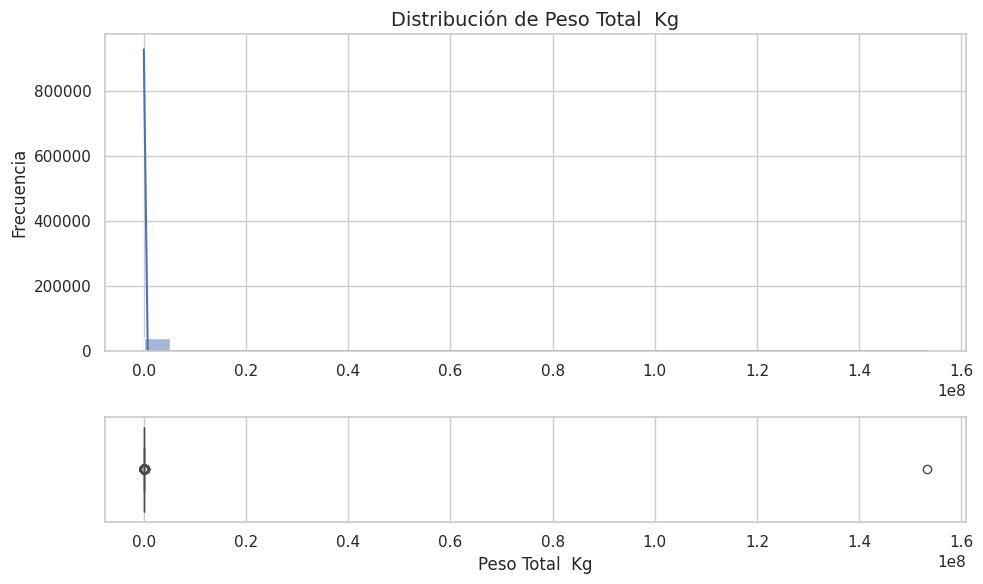

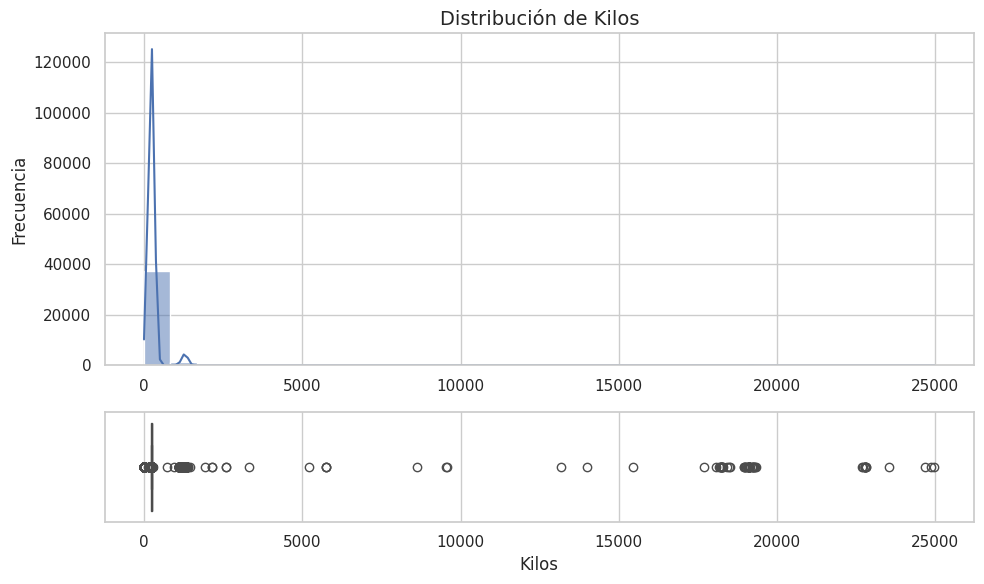

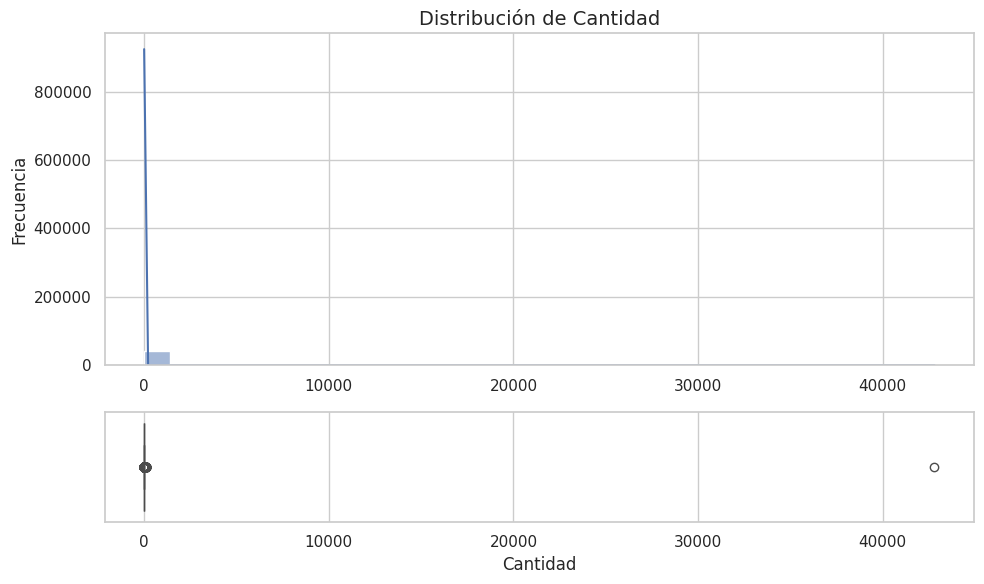

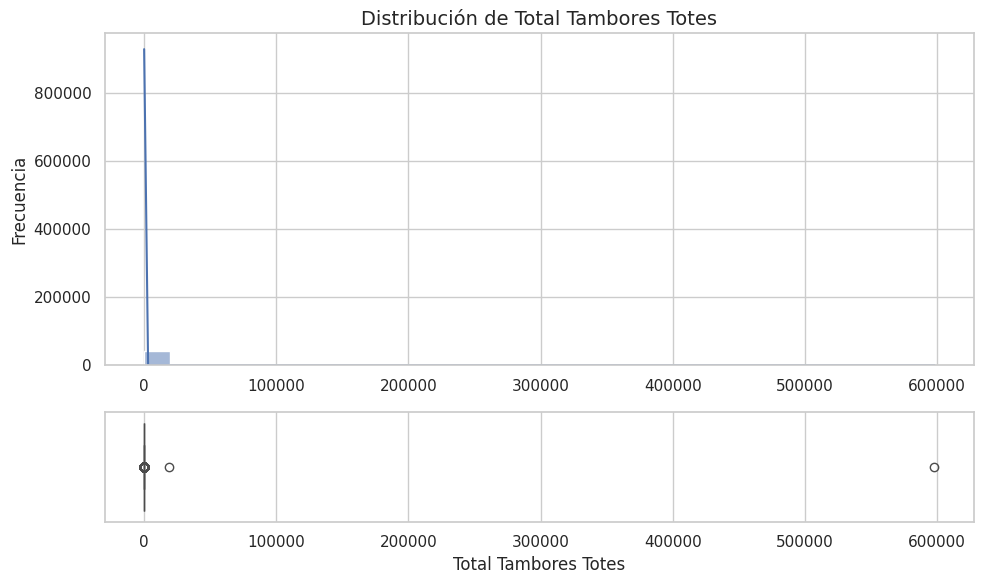

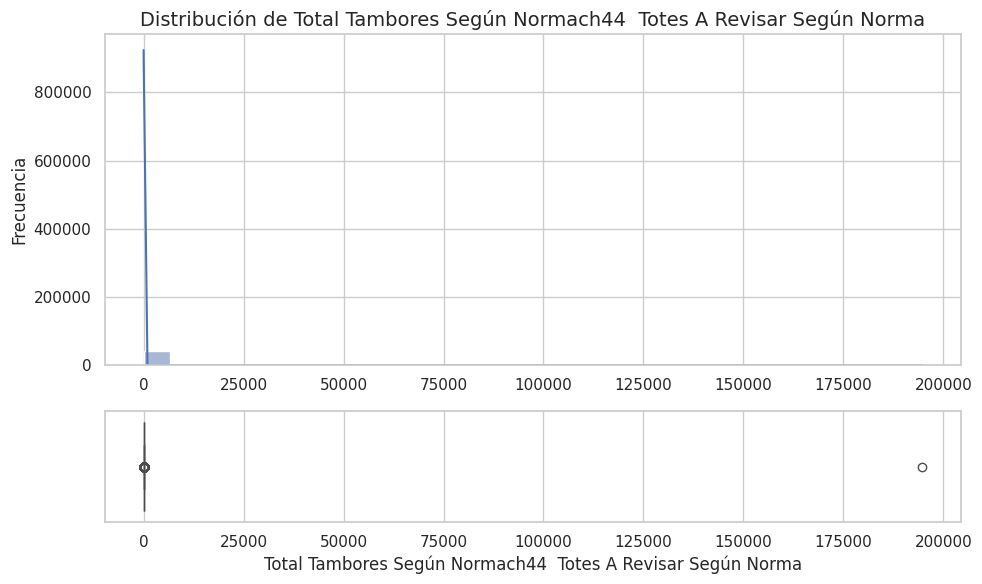

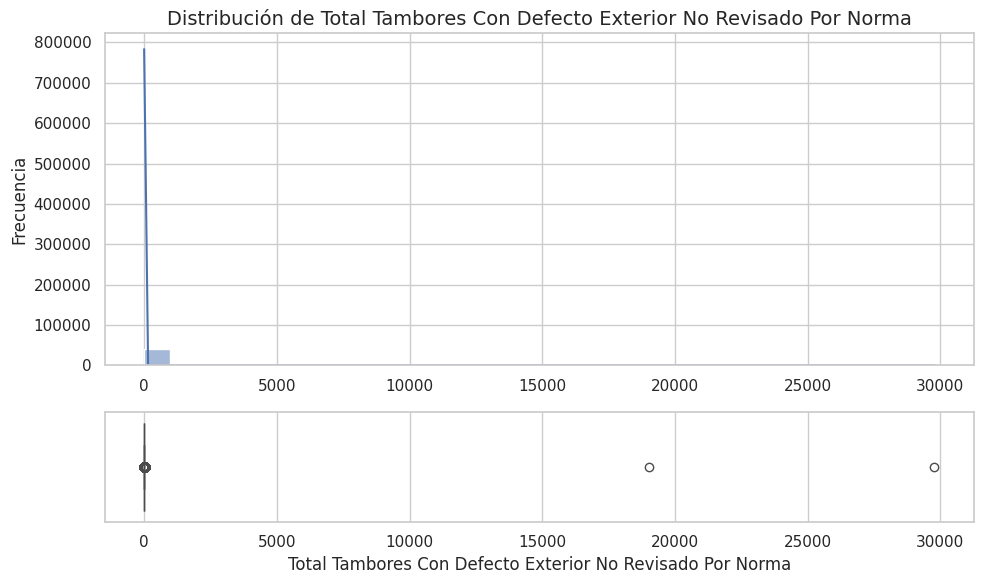

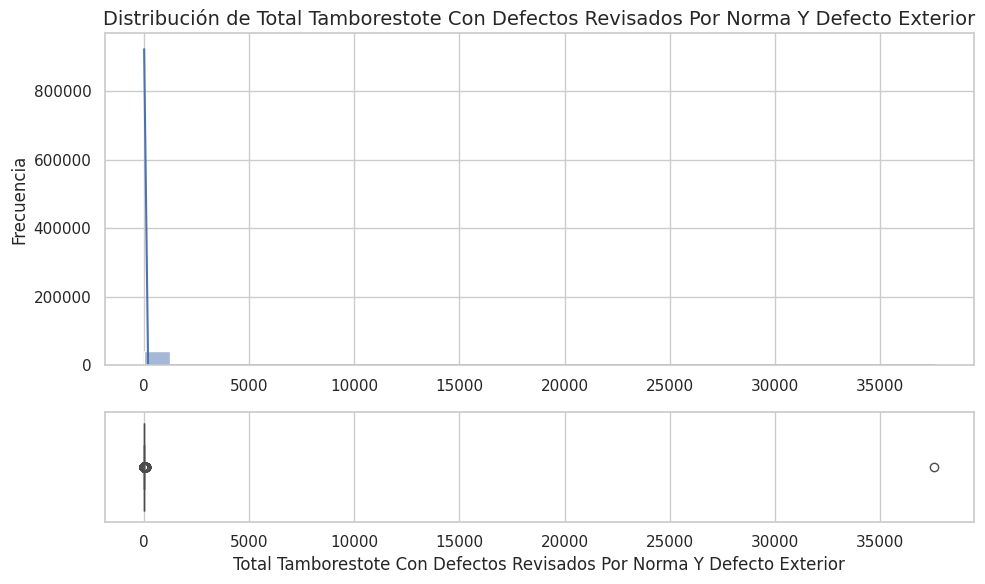

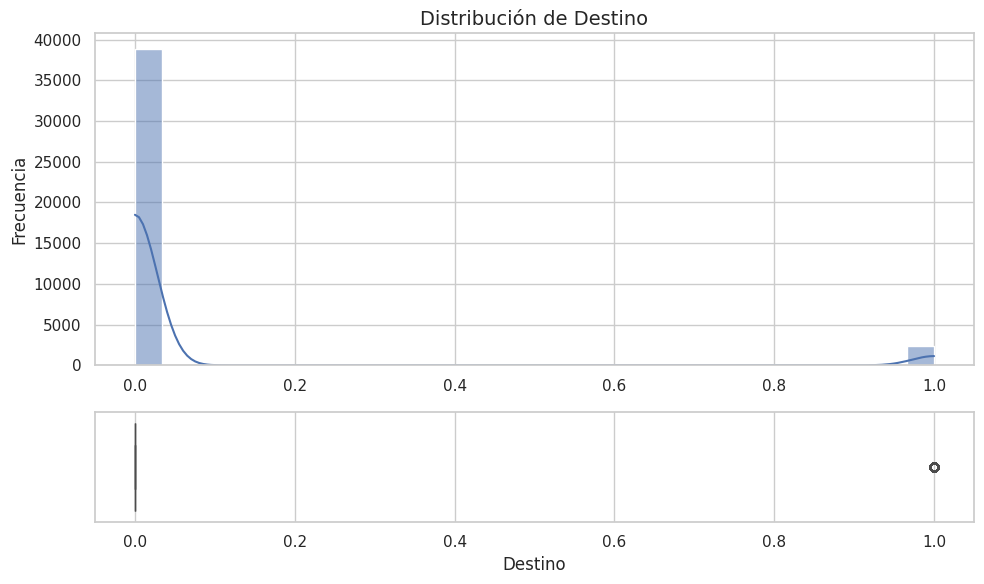

In [40]:
# ============================================================
# PASO 6.2 | VISUALIZACIÓN DE VARIABLES NUMÉRICAS CLAVE
# ============================================================

for col in numeric_key_columns:

    # Crear figura con dos gráficos (histograma + boxplot)
    fig, axes = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(10, 6),
        gridspec_kw={"height_ratios": [3, 1]}   # Histograma más grande
    )
    # -----------------------------
    # HISTOGRAMA (forma de la distribución)
    # -----------------------------
    sns.histplot(
        df[col].dropna(),                      # Elimina NA solo para graficar
        bins=30,                               # Número de bins estándar
        kde=True,                              # Curva de densidad
        ax=axes[0]
    )
    axes[0].set_title(f"Distribución de {col.replace('_', ' ').title()}")  # Título claro
    axes[0].set_ylabel("Frecuencia")           # Etiqueta eje Y
    axes[0].set_xlabel("")                     # Quita etiqueta eje X

    # -----------------------------
    # BOXPLOT (outliers y resumen)
    # -----------------------------
    sns.boxplot(
        x=df[col].dropna(),                    # Misma variable
        ax=axes[1],
        orient="h"                             # Horizontal para legibilidad
    )
    axes[1].set_xlabel(col.replace('_', ' ').title())  # Etiqueta eje X

    # -----------------------------
    # AJUSTES FINALES
    # -----------------------------
    plt.tight_layout()                         # Evita solapamientos
    plt.show()


## 📌 Resumen del Análisis Univariado de Variables Numéricas Clave

#### 1. `peso_total_kg`

La mayoría de los registros presenta un valor de **0 kg**, lo que se refleja en una mediana y percentiles bajos iguales a cero. Sin embargo, existen **valores extremadamente altos** que generan una **media y desviación estándar muy elevadas**, indicando una distribución **fuertemente sesgada a la derecha** con outliers de gran magnitud.


#### 2. `kilos`

Los datos se concentran principalmente en torno a los **235–240 kg**, con una mediana inferior a la media, lo que evidencia un **sesgo positivo moderado**. Aunque el comportamiento general es más estable que otras variables, se observan **outliers relevantes** que amplían considerablemente el rango de valores.


#### 3. `cantidad`

La **cantidad más frecuente es 1**, lo que sugiere registros mayoritariamente unitarios. No obstante, la presencia de **valores extremos muy altos** incrementa la media y la dispersión, generando una distribución **altamente asimétrica hacia la derecha**.

#### 4. `total_tambores_totes`

Predominan los valores **0**, indicando que la mayoría de los registros no incluye tambores o totes. La media se ve afectada por **casos excepcionales con volúmenes muy elevados**, lo que produce una alta variabilidad y un marcado sesgo a la derecha.


#### 5. `total_tambores_segn_normach44_totes_a_revisar_segn_norma`

Casi todos los registros presentan **0 tambores/totes a revisar**, mientras que un número reducido de observaciones con valores muy altos genera una **distribución extremadamente sesgada** y con **outliers significativos**.


#### 6. `total_tambores_con_defecto_exterior_no_revisado_por_norma`

La mayoría de los datos indica **ausencia de defectos exteriores**, concentrándose en 0. Sin embargo, existen **eventos puntuales con altos conteos**, lo que incrementa la dispersión y evidencia una fuerte asimetría positiva.

#### 7. `total_tambores_tote_con_defectos_revisados_por_norma_y_defecto_exterior`

Esta variable también presenta una **alta concentración en 0**, reflejando pocos casos con defectos. Los **valores extremos** detectados explican la diferencia entre media y mediana y confirman un patrón de **sesgo a la derecha**.

### Conclusión General

Todas las variables numéricas analizadas comparten una estructura de datos caracterizada por **muchos ceros y pocos valores extremos muy grandes**, lo que produce **distribuciones asimétricas** y **alta variabilidad**. Antes de realizar análisis inferenciales o modelamiento, es fundamental **validar los outliers**, evaluar su naturaleza (eventos reales vs. errores de registro) y considerar el uso de **medidas robustas o transformaciones** para un análisis más representativo.


## PASO 6.3 | ESTADÍSTICA INFERENCIAL COMPLETA – TABLA ÚNICA

In [57]:
# ============================================================
# PASO 6.3 | ESTADÍSTICA INFERENCIAL COMPLETA – TABLA ÚNICA
# ============================================================
import numpy as np                              # Cálculos numéricos
import pandas as pd                             # Manejo de DataFrames
from scipy.stats import shapiro, t, mannwhitneyu  # Tests estadísticos

confidence_level = 0.95                        # Nivel de confianza 95%
inferential_results = []                      # Lista para almacenar resultados finales
# ------------------------------------------------------------
# ANÁLISIS INFERENCIAL VARIABLE POR VARIABLE
# ------------------------------------------------------------
for col in numeric_key_columns:                # Iterar variables numéricas clave

    if col != 'destino':                       # Excluir variable objetivo
        # -----------------------------
        # 1. LIMPIEZA DE DATOS
        # -----------------------------
        data = df[col].dropna()                # Eliminar valores faltantes
        n = len(data)                          # Tamaño muestral
        mean = data.mean()                     # Media muestral
        std = data.std()                       # Desviación estándar muestral
        # -----------------------------
        # 2. NORMALIDAD (SHAPIRO-WILK)
        # -----------------------------
        # Evalúa si la variable sigue una distribución normal
        shapiro_stat, shapiro_p = shapiro(data)
        # -----------------------------
        # 3. INTERVALO DE CONFIANZA 95%
        # -----------------------------
        # Se usa t-Student (varianza poblacional desconocida)
        t_crit = t.ppf((1 + confidence_level) / 2, df=n - 1)
        margin_error = t_crit * (std / np.sqrt(n))

        ic_inf = mean - margin_error            # Límite inferior IC
        ic_sup = mean + margin_error            # Límite superior IC
        # -----------------------------
        # 4. COMPARACIÓN SEGÚN DESTINO
        # -----------------------------
        # Test no paramétrico (robusto ante no normalidad)
        grupo_0 = df[df['destino'] == 0][col].dropna()  # Destino = 0
        grupo_1 = df[df['destino'] == 1][col].dropna()  # Destino = 1

        mw_stat, mw_p = mannwhitneyu(
            grupo_0,
            grupo_1,
            alternative='two-sided'
        )
        # -----------------------------
        # 5. GUARDAR RESULTADOS
        # -----------------------------
        inferential_results.append({
            'Variable': col,                                   # Nombre variable
            'N': n,                                            # Tamaño muestral
            'Media': mean,                                     # Media
            'IC 95% Inferior': ic_inf,                          # IC inferior
            'IC 95% Superior': ic_sup,                          # IC superior
            'Shapiro p-value': shapiro_p,                       # Normalidad
            'Normalidad': 'Sí' if shapiro_p > 0.05 else 'No',   # Diagnóstico
            'p-value (Destino)': mw_p,                          # Comparación
            'Dif. significativa (Destino)': 'Sí' if mw_p < 0.05 else 'No'
        })
# ------------------------------------------------------------
# TABLA FINAL DE ESTADÍSTICA INFERENCIAL
# ------------------------------------------------------------
inferential_df = pd.DataFrame(inferential_results)

# Mostrar tabla única final
inferential_df

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41215.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38828.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41057.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41217.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.

,Variable,N,Media,IC 95% Inferior,IC 95% Superior,Shapiro p-value,Normalidad,p-value (Destino),Dif. significativa (Destino)
0,peso_total__kg,41215,7439.053185,147.003766,14731.102603,7.200906e-158,No,1.664534e-04,Sí
1,kilos,38828,295.001700,287.260571,302.742828,7.147930e-154,No,1.261896e-29,Sí
2,cantidad,41057,2.084736,0.041454,4.128017,9.232682e-158,No,7.295589e-27,Sí
3,total_tambores_totes,41217,29.020501,0.560288,57.480715,7.193718e-158,No,1.888600e-06,Sí
4,total_tambores_según_normach44__totes_a_revisa...,41218,9.446965,0.186925,18.707005,7.223606e-158,No,3.419386e-05,Sí
5,total_tambores_con_defecto_exterior_no_revisad...,41219,1.445110,-0.235762,3.125983,7.260361e-158,No,1.448012e-03,Sí
6,total_tamborestote_con_defectos_revisados_por_...,41215,1.824239,0.036075,3.612402,7.304964e-158,No,6.395071e-02,No


##  Interpretación de la Tabla de Estadística Inferencial

Esta tabla detalla las características clave de las variables numéricas y su relación con el `destino` (liberado/decomisado):

*   **Normalidad (Shapiro p-value):** Ninguna de las variables numéricas clave sigue una distribución normal (todos los p-values son muy bajos). Esto confirma que sus distribuciones son sesgadas, como se observó en los histogramas.

*   **Intervalo de Confianza (IC 95%):** Los amplios intervalos de confianza en algunas variables (`peso_total__kg`, `total_tambores_totes`) reflejan la alta variabilidad y la presencia de valores extremos (outliers).

*   **Diferencia Significativa por Destino (p-value Mann-Whitney U):** Para la mayoría de las variables, el `p-value` es menor a 0.05, indicando una **diferencia estadísticamente significativa** en la distribución de la variable entre productos liberados y decomisados. Esto significa que los productos decomisados tienden a tener valores distintos en estas métricas en comparación con los liberados, haciendo que estas variables sean importantes para predecir el destino.

**Conclusión:** Aunque las variables numéricas no son normales, son **predictoras importantes** del `destino` del producto, ya que sus distribuciones difieren significativamente entre los ítems liberados y los decomisados (con una excepción). Esto justifica su consideración en análisis y modelos futuros.

# PASO 7 — ANÁLISIS DE VARIABLES CATEGÓRICAS

In [42]:
# ============================================================
# PASO 7 | ANÁLISIS DE VARIABLES CATEGÓRICAS
# ============================================================

# -----------------------------
# DEFINICIÓN DE VARIABLES CATEGÓRICAS CLAVE
# -----------------------------
categorical_key_columns = [
    'nombre_de_producto',
    'cliente',
    'defecto',
    'accin',
    'destino',
    'linea',
    'analista_que_preparacin',
    'analista_que_despacha'
]

# Mantener solo columnas existentes en el DataFrame
categorical_key_columns = [
    col for col in categorical_key_columns if col in df.columns
]

# -----------------------------
# FRECUENCIAS ABSOLUTAS Y RELATIVAS
# -----------------------------
for col in categorical_key_columns:

    print(f"\n📊 Variable categórica: {col.replace('_', ' ').title()}\n")

    # Frecuencia absoluta
    freq_abs = df[col].value_counts(dropna=False)
    print("Frecuencia absoluta:")
    print(freq_abs)

    # Frecuencia relativa (%)
    freq_rel = df[col].value_counts(dropna=False, normalize=True) * 100
    print("\nFrecuencia relativa (%):")
    print(freq_rel.round(2))



📊 Variable categórica: Nombre De Producto

Frecuencia absoluta:
nombre_de_producto
PASTA TOMATE HB 30/32 BRIX ST 55GAL        6553
PASTA TOMATE HB 30/32 NTSS 55GAL 1,5MM     2563
PULPA PERA 30/32 BRIX ST 55GAL             1578
PULPA MANZANA 30/32 BRIX A/A ST 55GAL      1535
PASTA TOMATE CB 28/30 NTSS ESP 55GAL       1525
                                           ... 
PULPA  DURAZNO 30/32 BX STF 55GAL             1
PULP PERA 30/32 BRIX ST 55GAL                 1
PULPA DURAZNO 30/32 BRIX  ST 55GAL            1
PULPA DURAZNO 30/32 BRIX ESP C 55GL           1
PULPA DURAZNO 30/32 BX CILIND ESP 55GAL       1
Name: count, Length: 239, dtype: int64

Frecuencia relativa (%):
nombre_de_producto
PASTA TOMATE HB 30/32 BRIX ST 55GAL        15.90
PASTA TOMATE HB 30/32 NTSS 55GAL 1,5MM      6.22
PULPA PERA 30/32 BRIX ST 55GAL              3.83
PULPA MANZANA 30/32 BRIX A/A ST 55GAL       3.72
PASTA TOMATE CB 28/30 NTSS ESP 55GAL        3.70
                                           ...  
PULPA  DUR

## PASO 7.1—VISUALIZACIÓN — GRÁFICOS CLAROS Y COMPARABLES

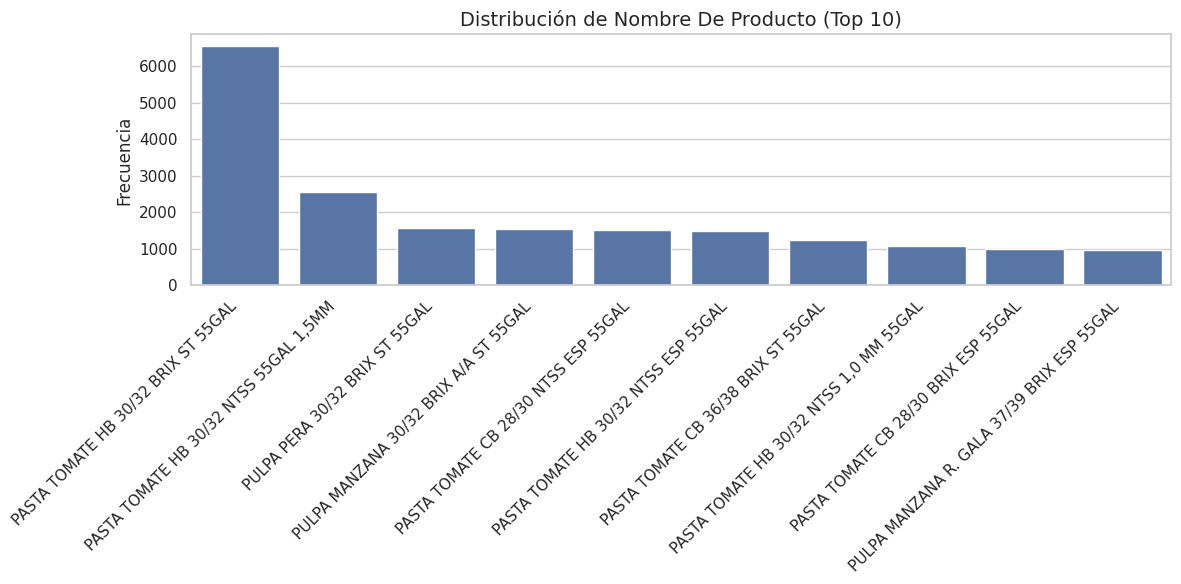

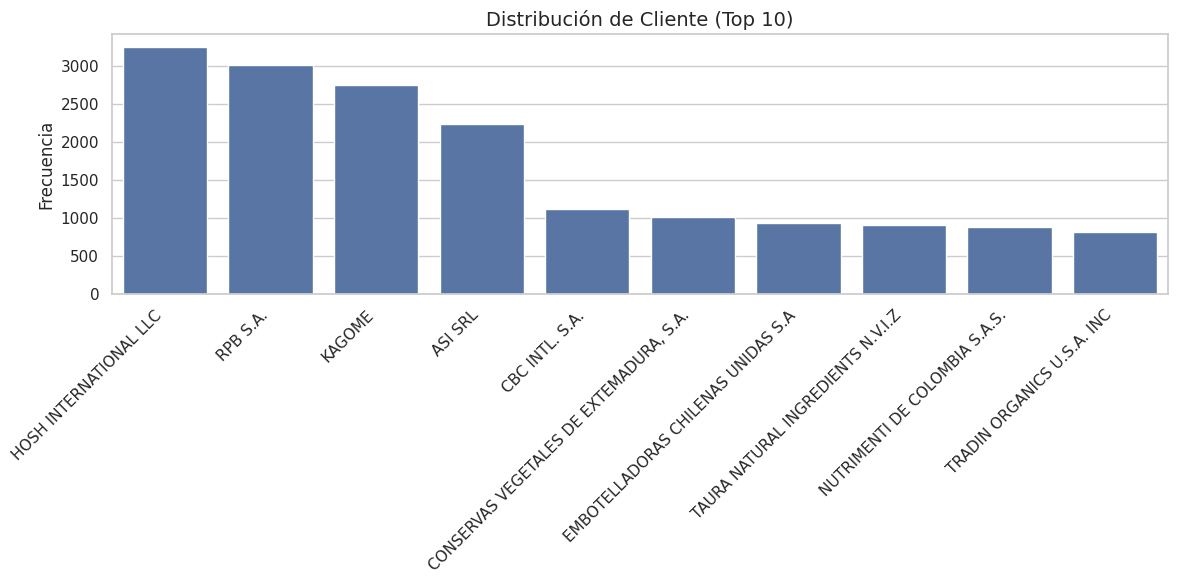

/tmp/ipython-input-3705730577.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()                               # Ajusta automáticamente los márgenes


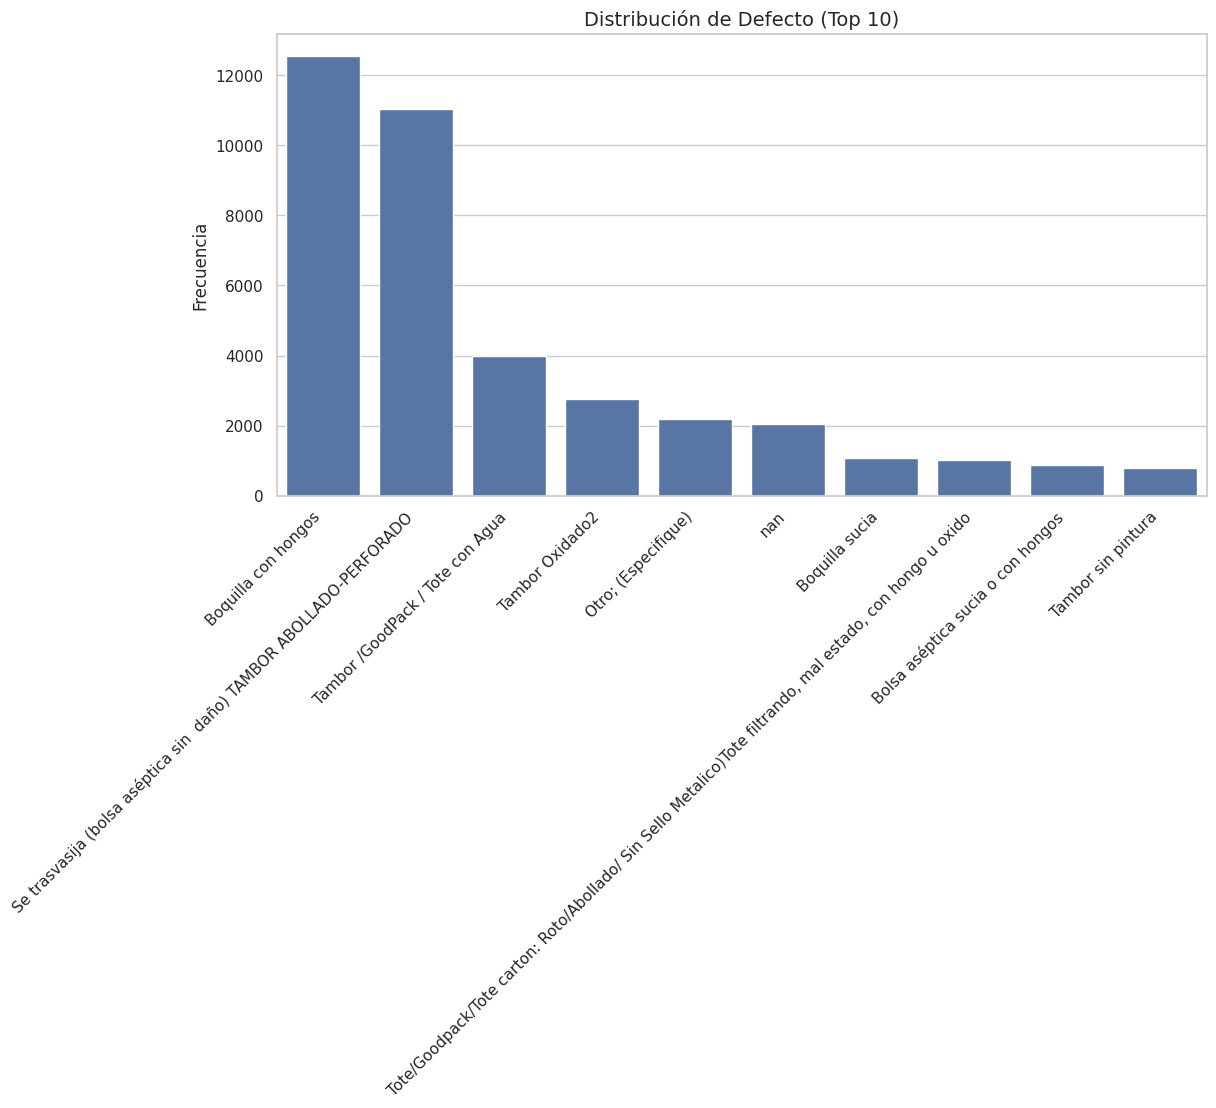

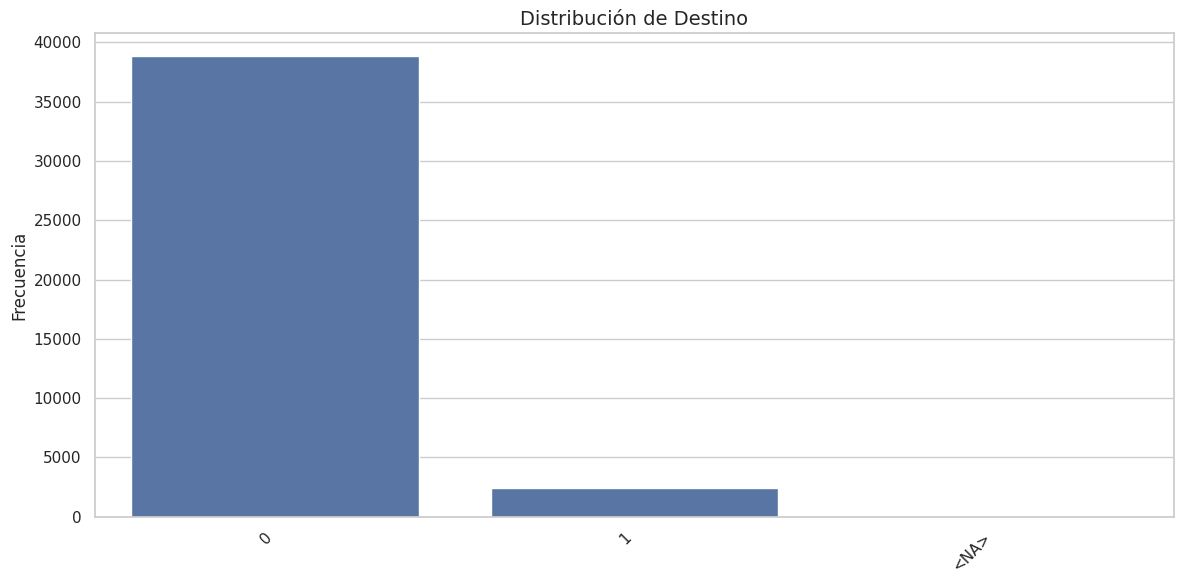

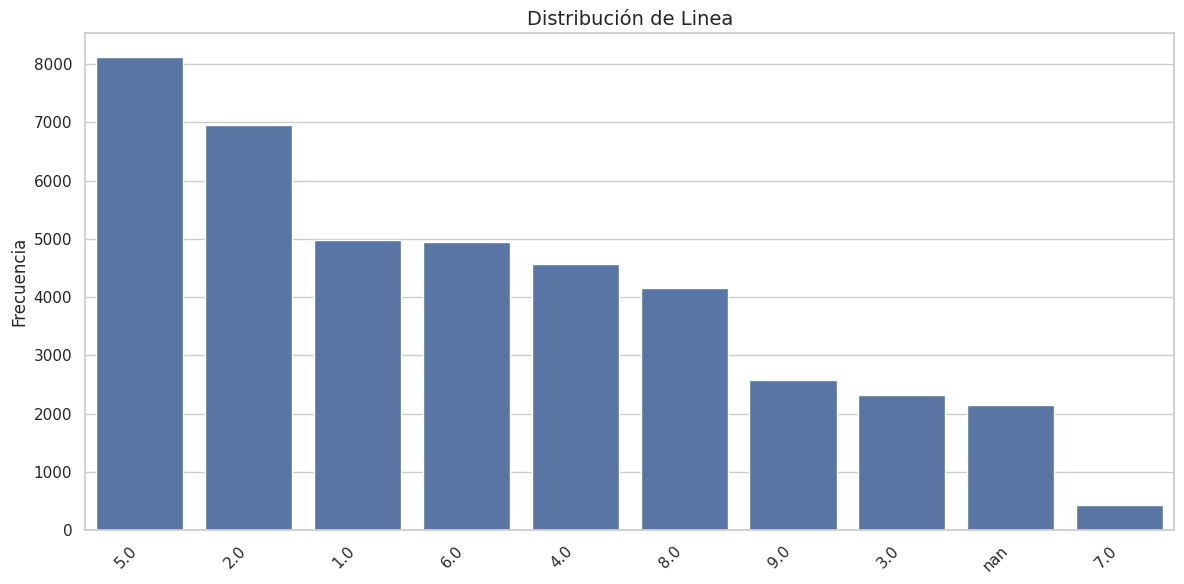

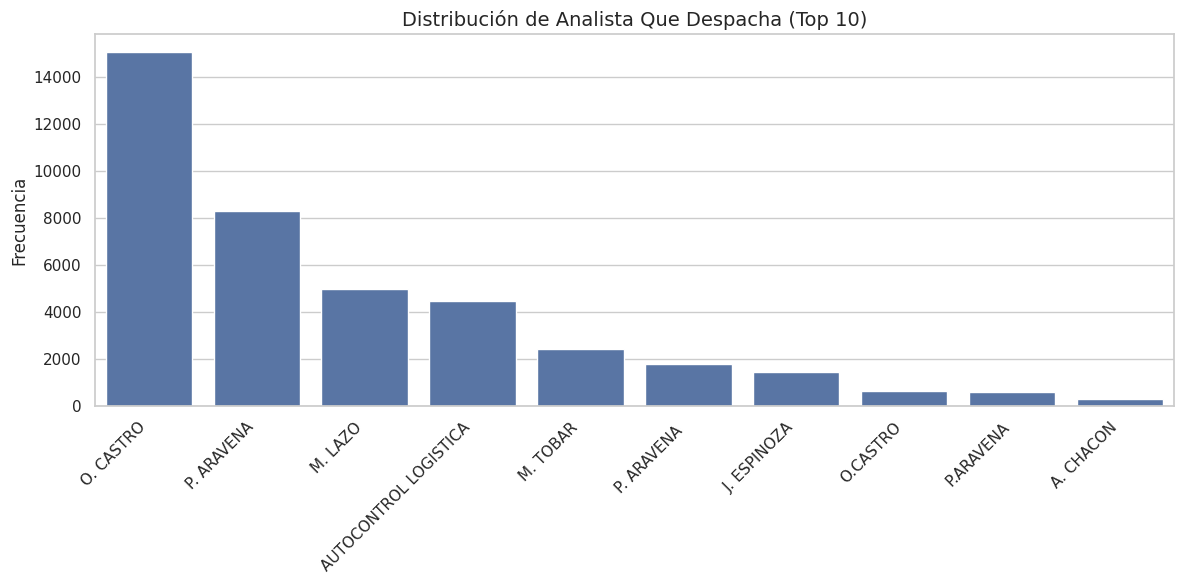

In [43]:
# ============================================================
# VISUALIZACIÓN DE VARIABLES CATEGÓRICAS
# ============================================================

for col in categorical_key_columns:                 # Recorre cada columna categórica seleccionada

    # Contar categorías
    freq = df[col].value_counts(dropna=False)       # Cuenta frecuencia de cada categoría (incluye NaN)

    # Seleccionar Top 10 si hay muchas categorías
    if freq.shape[0] > 10:                           # Verifica si hay más de 10 categorías
        freq = freq.head(10)                         # Mantiene solo las 10 más frecuentes
        title_suffix = " (Top 10)"                   # Agrega texto aclaratorio al título
    else:
        title_suffix = ""                            # No agrega sufijo si hay pocas categorías

    # Crear gráfico
    plt.figure(figsize=(12, 6))                      # Define tamaño del gráfico

    sns.barplot(
        x=freq.index.astype(str),                    # Eje X: nombres de las categorías
        y=freq.values                                # Eje Y: frecuencia de cada categoría
    )

    plt.title(f"Distribución de {col.replace('_', ' ').title()}{title_suffix}")  # Título del gráfico
    plt.ylabel("Frecuencia")                         # Etiqueta del eje Y
    plt.xlabel("")                                  # Sin etiqueta en eje X
    plt.xticks(rotation=45, ha="right")              # Rota etiquetas para mejor lectura

    plt.tight_layout()                               # Ajusta automáticamente los márgenes
    plt.show()                                       # Muestra el gráfico en pantalla



## Interpretación de Variables Categóricas

### 1. `nombre_de_producto`

Existe una **alta diversidad de productos**, pero la actividad se concentra en unos pocos. Un número reducido de ítems domina el volumen total, destacando productos líderes, mientras que la mayoría tiene una participación marginal.


### 2. `cliente`

Aunque hay muchos clientes distintos, **la mayor parte del negocio proviene de un grupo reducido**. Esto refleja una estructura tipo Pareto, donde algunos clientes son estratégicamente clave para la operación.

### 3. `defecto`

Los defectos se concentran principalmente en **dos categorías dominantes**, lo que permite identificar claramente las **principales fuentes de problemas de calidad**. La presencia de registros sin especificación indica oportunidades de mejora en el registro de información.


### 4. `destino`

La gran mayoría de los productos está **liberada para despacho**, mientras que una proporción menor corresponde a **decomisos**. Este indicador es clave para evaluar la calidad global y las pérdidas asociadas.


### 5. `linea`

Algunas líneas de producción concentran más actividad que otras. La existencia de **valores sin línea asignada** sugiere la necesidad de mejorar la trazabilidad del proceso productivo.


### 6. `analista_que_despacha`

La actividad está concentrada en pocos analistas, lo que puede reflejar **especialización o desequilibrios de carga laboral**. Se detectan inconsistencias en la escritura de nombres, evidenciando la necesidad de **estandarización de datos**.


###  Conclusión General

Las variables categóricas analizadas presentan **patrones de alta concentración**, donde pocos elementos explican la mayor parte de los registros. Este comportamiento es clave para **priorizar acciones**, mejorar el control de calidad, optimizar procesos productivos y fortalecer la gestión de clientes y recursos humanos.


# PASO 8 — ANÁLISIS TEMPORAL

## PASO 8.1 — PREPARACIÓN DE VARIABLES TEMPORALES

In [44]:
# ============================================================
# PASO 8.1 | PREPARACIÓN DE VARIABLES TEMPORALES
# ============================================================

# Asegurar que las columnas de fecha sean datetime
df['fecha_de_la_revisión'] = pd.to_datetime(df['fecha_de_la_revisión'], errors='coerce')   # Fecha de revisión
df['fecha_envasado'] = pd.to_datetime(df['fecha_envasado'], errors='coerce')             # Fecha de envasado
df['fecha_despacho'] = pd.to_datetime(df['fecha_despacho'], errors='coerce')             # Fecha de despacho

print("✅ Columnas de fecha verificadas y preparadas")

✅ Columnas de fecha verificadas y preparadas


## PASO 8.2.1 | EVENTOS CRÍTICOS POR SEMANA (SECUENCIA CONTINUA)

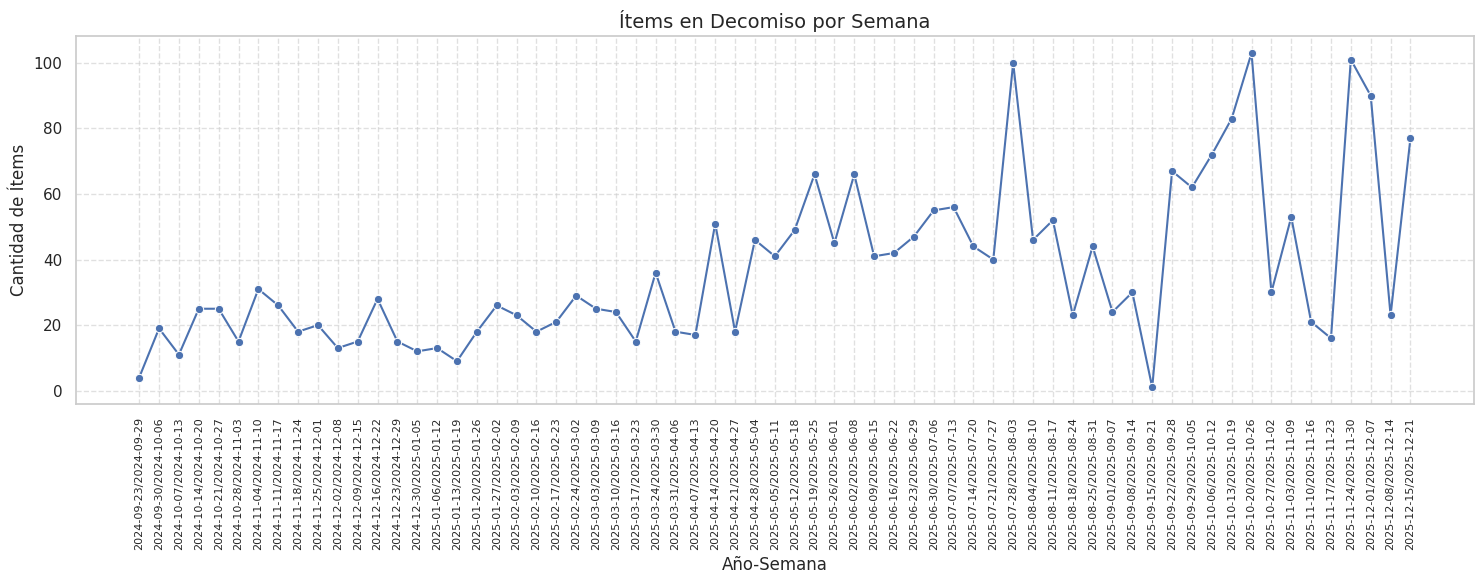

In [45]:
# ============================================================
# PASO 8.2.1 | ÍTEMS EN DECOMISO POR SEMANA
# ============================================================

df_decomiso = df[df['destino'] == 1].copy()                          # Filtra solo los registros en decomiso (destino = 1)
df_decomiso['semana'] = df_decomiso['fecha_de_la_revisión'].dt.to_period('W')  # Extrae la semana del año desde la fecha

decomiso_semana = (
    df_decomiso
    .groupby('semana')                                               # Agrupa los registros por semana
    .size()                                                          # Cuenta la cantidad de ítems por semana
    .reset_index(name='conteo_decomiso')                             # Convierte el conteo en una columna
    .sort_values('semana')                                           # Ordena cronológicamente por semana
)

plt.figure(figsize=(15, 6))                                          # Define el tamaño del gráfico
sns.lineplot(
    x=decomiso_semana['semana'].astype(str),                         # Eje X: semanas en formato texto
    y='conteo_decomiso',                                             # Eje Y: cantidad de ítems en decomiso
    data=decomiso_semana,                                            # Dataset a utilizar
    marker='o'                                                       # Marca cada punto en la línea
)
plt.title('Ítems en Decomiso por Semana')                             # Título del gráfico
plt.xlabel('Año-Semana')                                             # Etiqueta del eje X
plt.ylabel('Cantidad de Ítems')                                      # Etiqueta del eje Y
plt.xticks(rotation=90, fontsize=8)                                  # Rota etiquetas para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)                            # Agrega grilla tenue al gráfico
plt.tight_layout()                                                   # Ajusta automáticamente los márgenes
plt.show()                                                           # Muestra el gráfico


## Interpretación del Gráfico: Ítems en Decomiso por Semana

Este gráfico de línea muestra la evolución de la cantidad de ítems que han sido clasificados como 'Decomiso' a lo largo del tiempo, agrupados por semana. Observando el patrón general, podemos inferir lo siguiente:

*   **Periodo de tiempo:** El análisis abarca un rango temporal que va desde finales de septiembre de 2024 hasta, al menos, mediados de diciembre de 2025, lo que nos da una perspectiva de más de un año de operaciones.

*   **Volumen de decomiso:** Se observa una variabilidad en el número de ítems decomisados por semana. Al inicio del periodo mostrado (finales de 2024), los conteos son relativamente bajos, pero hacia el final del periodo visible (finales de 2025) se aprecian semanas con volúmenes significativamente más altos, como 101 y 90 ítems. Esto sugiere un posible aumento en la cantidad de desechos o una mayor detección de problemas de calidad en ciertos momentos.

*   **Tendencias y estacionalidad:** La gráfica revela que no hay un número constante de decomisos. Existen picos y valles a lo largo del tiempo, lo que sugiere que factores operativos, estacionales o eventos específicos podrían estar influyendo en la cantidad de productos que terminan en decomiso.

*   **Variabilidad:** La distribución de los puntos indica una considerable variabilidad de una semana a otra. Esto resalta la importancia de monitorear estas fluctuaciones para identificar las causas raíz detrás de los incrementos y tomar acciones correctivas o preventivas.

En resumen, el gráfico es una herramienta clave para identificar cuándo y con qué frecuencia ocurren los decomisos, permitiendo a los equipos de calidad y operaciones investigar las semanas con altos volúmenes para entender los factores contribuyentes y mejorar los procesos.

 ## PASO 8.2.2 Acciones de Trasvasije por semana

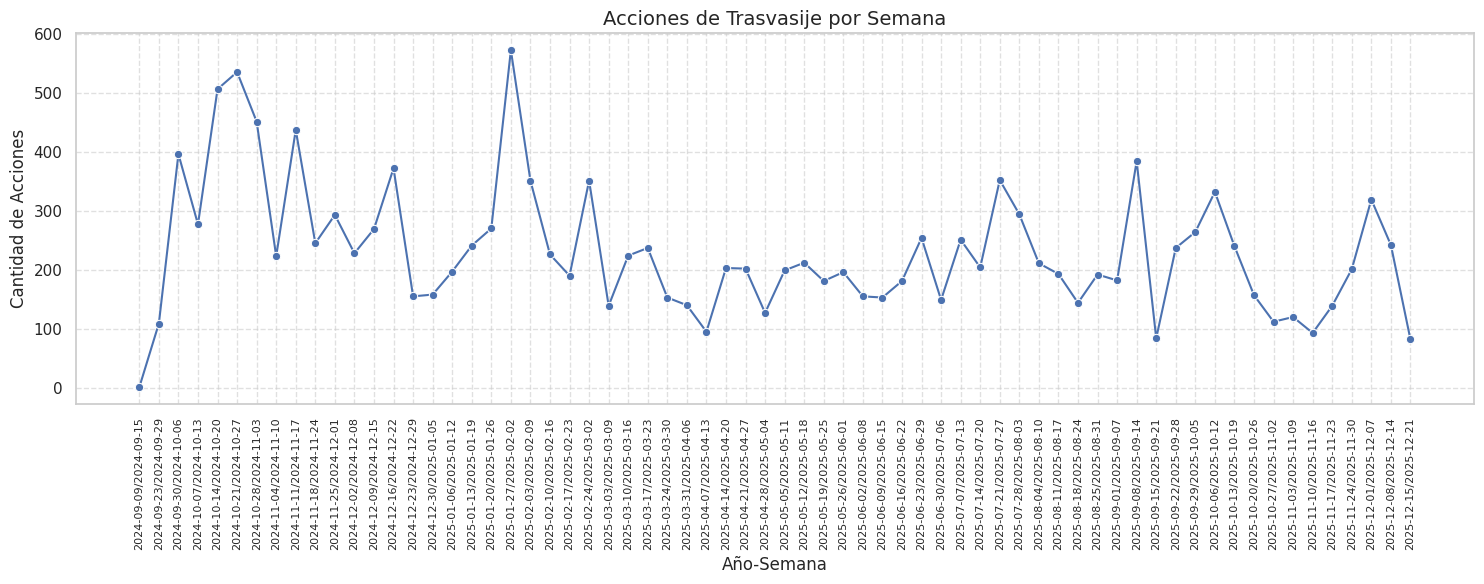

In [46]:
# ============================================================
# PASO 8.2.2 | ACCIONES DE TRASVASIJE POR SEMANA
# ============================================================

df_trasvasije = df[df['acción'].str.contains('Trasvasije', na=False)].copy()     # Filtra filas cuya acción contiene "Trasvasije"
df_trasvasije['semana'] = df_trasvasije['fecha_de_la_revisión'].dt.to_period('W')  # Extrae la semana del año desde la fecha

trasvasije_semana = (
    df_trasvasije
    .groupby('semana')                                                           # Agrupa los registros por semana
    .size()                                                                      # Cuenta acciones de trasvasije por semana
    .reset_index(name='conteo_trasvasije')                                       # Convierte el conteo en una columna
    .sort_values('semana')                                                       # Ordena cronológicamente por semana
)

plt.figure(figsize=(15, 6))                                                      # Define el tamaño del gráfico
sns.lineplot(
    x=trasvasije_semana['semana'].astype(str),                                   # Eje X: semanas en formato texto
    y='conteo_trasvasije',                                                       # Eje Y: cantidad de acciones
    data=trasvasije_semana,                                                      # Dataset a utilizar en el gráfico
    marker='o'                                                                   # Marca cada punto en la línea
)
plt.title('Acciones de Trasvasije por Semana')                                    # Título del gráfico
plt.xlabel('Año-Semana')                                                         # Etiqueta del eje X
plt.ylabel('Cantidad de Acciones')                                               # Etiqueta del eje Y
plt.xticks(rotation=90, fontsize=8)                                              # Rota etiquetas para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)                                        # Agrega grilla tenue al gráfico
plt.tight_layout()                                                               # Ajusta automáticamente los márgenes
plt.show()                                                                       # Muestra el gráfico


## Interpretación del Gráfico: Acciones de Trasvasije por Semana

Este gráfico de línea temporal ilustra la cantidad de acciones de trasvasije realizadas cada semana. Al analizarlo, podemos extraer las siguientes observaciones:

*   **Frecuencia y Volumen:** El gráfico muestra que las acciones de trasvasije son eventos recurrentes, aunque su volumen semanal varía considerablemente. Hay semanas con muy pocas acciones y otras con un número elevado, llegando a picos por encima de las 150 acciones.

*   **Patrones de Actividad:** Podemos observar periodos de mayor actividad de trasvasije, seguidos de periodos más tranquilos. Esto podría sugerir una relación con ciclos de producción específicos, campañas de productos, o la acumulación y resolución de problemas de calidad o inventario que requieren estas acciones.

*   **Picos Significativos:** La presencia de picos pronunciados indica que hubo semanas donde se necesitó una intervención considerable de trasvasije. Es crucial investigar qué eventos o causas específicas llevaron a estos aumentos, ya que el trasvasije a menudo implica un costo y un esfuerzo adicionales.

*   **Variabilidad Consistente:** La gráfica no parece mostrar una tendencia constante al alza o a la baja a lo largo de todo el periodo, sino más bien una variabilidad inherente en la operación. Esta fluctuación constante resalta la importancia de una gestión ágil y adaptable para manejar estas acciones.

En resumen, el gráfico de 'Acciones de Trasvasije por Semana' es fundamental para la gestión de operaciones y calidad. Permite identificar los momentos de mayor demanda de recursos para estas acciones, analizar sus causas raíz (por ejemplo, tipos de defectos, problemas de embalaje, etc.), y optimizar los procesos para reducir la necesidad de trasvasijes o mejorar su eficiencia.

## PASO 8.3 | EVENTOS POR DÍA (VISIÓN MACRO)

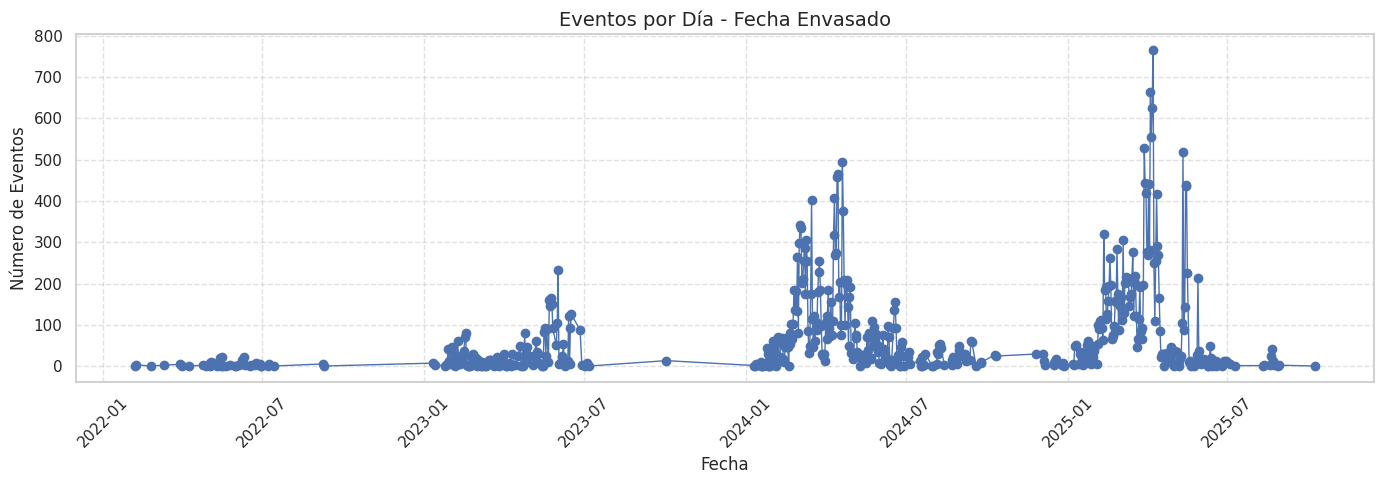

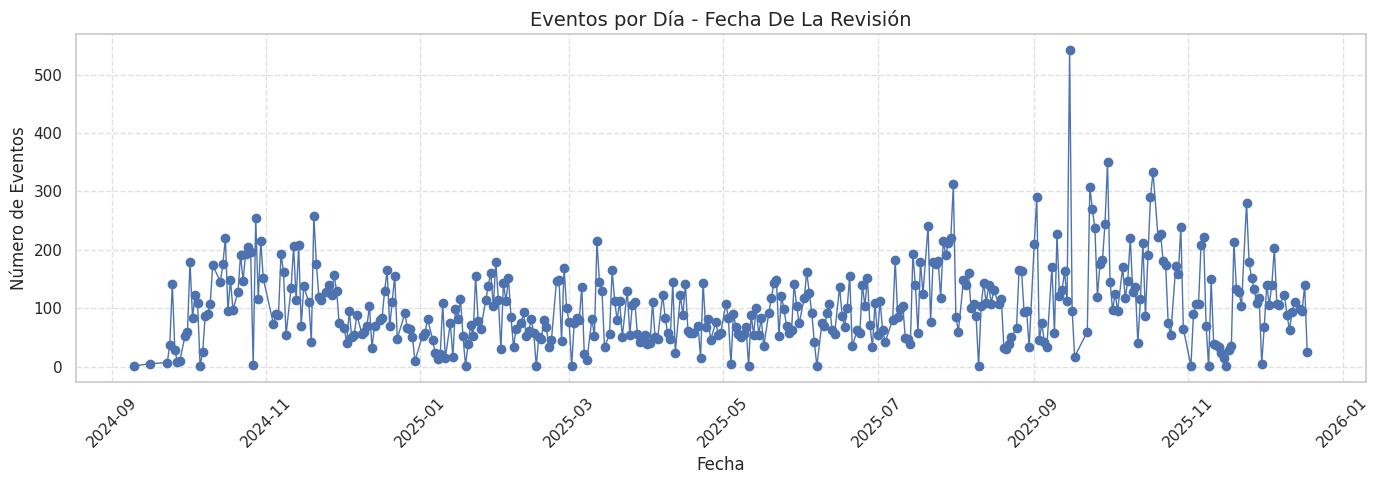

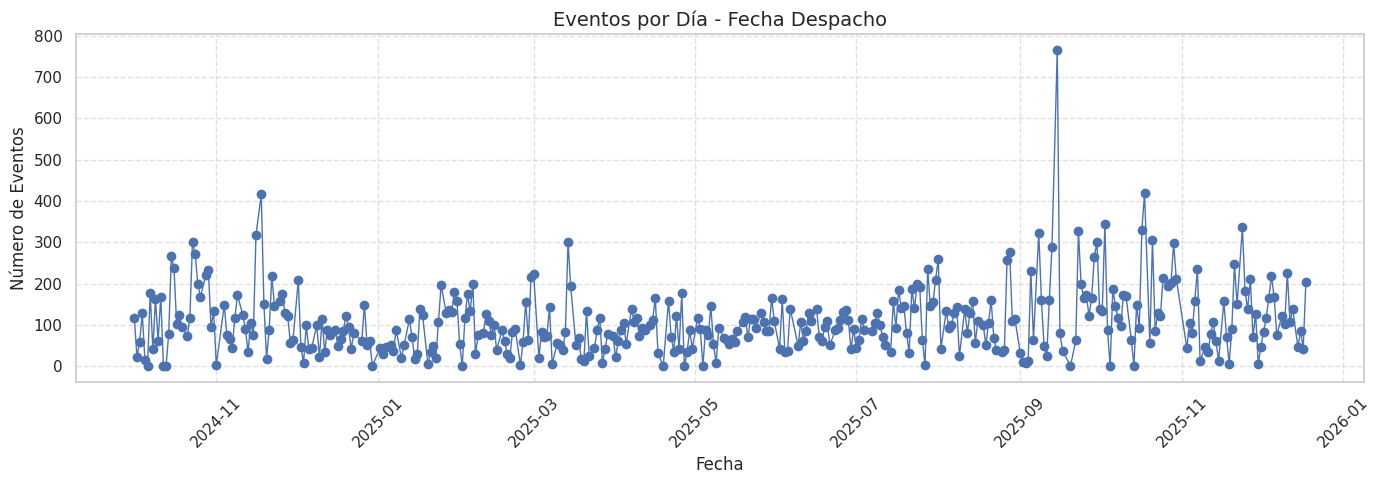

In [47]:
# ============================================================
# PASO 8.3 | EVENTOS POR DÍA (VISIÓN MACRO)
# ============================================================

# Columnas de fecha a analizar
date_columns = [
    'fecha_envasado',                   # Fecha de envasado del producto
    'fecha_de_la_revisión',             # Fecha de revisión del ítem
    'fecha_despacho'                    # Fecha de despacho
]

for col in date_columns:                # Recorre cada columna de fecha

    # Conteo de eventos por día (ignora horas)
    daily_counts = (
        df[col]
        .dt.date                         # Extrae solo la fecha (sin hora)
        .value_counts()                 # Cuenta cuántos eventos hay por día
        .sort_index()                   # Ordena las fechas de forma cronológica
    )

    if not daily_counts.empty:          # Verifica que existan datos para graficar

        plt.figure(figsize=(14, 5))     # Define un tamaño ancho para series temporales

        daily_counts.plot(
            kind='line',                # Tipo de gráfico: línea
            marker='o',                 # Marca cada punto diario
            linewidth=1                 # Grosor de la línea
        )

        plt.title(f'Eventos por Día - {col.replace("_", " ").title()}')  # Título dinámico del gráfico
        plt.xlabel('Fecha')             # Etiqueta del eje X
        plt.ylabel('Número de Eventos') # Etiqueta del eje Y
        plt.xticks(rotation=45)         # Rota fechas para mejor lectura
        plt.grid(True, linestyle='--', alpha=0.6)  # Agrega grilla suave

        plt.tight_layout()              # Ajusta automáticamente márgenes y espacios
        plt.show()                      # Muestra el gráfico


## Interpretación Individual de los Gráficos: Eventos por Día (Visión Macro)

### 1. Gráfico: Eventos por Día - Fecha Envasado

Este gráfico muestra la actividad diaria de envasado de productos. Podemos observar:

*   **Patrones de Actividad:** La línea de tiempo revela días con alta actividad de envasado y otros con baja o nula actividad. Es probable que los valles correspondan a fines de semana o días festivos, mientras que los picos representan días laborales de producción intensiva.
*   **Tendencias de Producción:** A lo largo del período, se pueden identificar tendencias generales en el volumen de envasado. Un aumento constante podría indicar un crecimiento en la producción, mientras que caídas prolongadas podrían señalar periodos de baja demanda o interrupciones en la cadena de suministro.
*   **Irregularidades:** Los picos inusualmente altos o valles inesperados en días laborales pueden ser indicadores de eventos especiales (como un gran pedido) o problemas en la línea de envasado que requieren investigación.

### 2. Gráfico: Eventos por Día - Fecha de la Revisión

Este gráfico ilustra la cantidad de ítems revisados diariamente. Aquí, podemos analizar:

*   **Ritmo de Calidad:** La actividad de revisión suele seguir el ritmo de producción o despacho. Una alta correlación entre el envasado y la revisión podría indicar un proceso de control de calidad ágil. Si hay desfases significativos, podría haber acumulaciones de productos pendientes de revisión.
*   **Cargas de Trabajo:** Los picos en la revisión pueden indicar momentos de alta carga de trabajo para el equipo de control de calidad, posiblemente en respuesta a un aumento en la producción o a la necesidad de procesar lotes grandes.
*   **Variabilidad:** Como en el envasado, la variabilidad diaria es esperable, con menor actividad en días no laborales. La observación de patrones atípicos puede ayudar a identificar eficiencias o cuellos de botella en el proceso de revisión.

### 3. Gráfico: Eventos por Día - Fecha Despacho

Este gráfico representa la actividad diaria de despacho de productos. Sus principales insights son:

*   **Cadencia de Envíos:** Muestra cuándo los productos están saliendo de la planta. Los picos suelen estar asociados con fechas límite de entrega, cierres de mes o días de mayor volumen de pedidos.
*   **Impacto de la Logística:** La regularidad o irregularidad en los despachos puede reflejar la eficiencia de la logística y la planificación de rutas. Los días sin actividad de despacho (valles) son típicos de fines de semana.
*   **Relación con Otros Procesos:** La relación entre la 'Fecha de la Revisión' y la 'Fecha Despacho' es crucial. Un despacho rápido después de la revisión es ideal. Si hay demoras significativas, podría indicar problemas de almacenamiento, transporte o cumplimiento de pedidos.

### Conclusión General

Al analizar estos tres gráficos en conjunto, se obtiene una visión integral del flujo de producto desde el envasado hasta el despacho. Permiten identificar la cadencia operativa de cada etapa, detectar cuellos de botella, planificar recursos y reaccionar ante anomalías que puedan afectar la eficiencia y la calidad general del proceso. Las tendencias y patrones observados son cruciales para la toma de decisiones estratégicas y operativas.

## PASO 8.4 | CÁLCULO DE DURACIONES DE PROCESO  y  CREACIÓN DE DOS VARIABLES NUEVAS (COLUMNAS)

In [48]:
# ============================================================
# PASO 8.4 | CÁLCULO DE DURACIONES DE PROCESO
# ============================================================

# Duración entre envasado y revisión (en días)
df['duracion_envasado_revision'] = (                       # Crea nueva columna de duración
    df['fecha_de_la_revisión'] - df['fecha_envasado']      # Resta fechas: revisión − envasado
).dt.days                                                   # Convierte la diferencia a días enteros

# Duración entre revisión y despacho (en días)
df['duracion_revision_despacho'] = (                       # Crea nueva columna de duración
    df['fecha_despacho'] - df['fecha_de_la_revisión']      # Resta fechas: despacho − revisión
).dt.days                                                   # Convierte la diferencia a días enteros

print("✅ Duraciones de proceso calculadas correctamente")  # Mensaje de confirmación

# -----------------------------
# VALIDACIÓN RÁPIDA
# -----------------------------
df[                                                          # Selecciona columnas clave para revisión
    [
        'fecha_envasado',                                   # Fecha inicial del proceso
        'fecha_de_la_revisión',                             # Fecha intermedia
        'fecha_despacho',                                   # Fecha final
        'duracion_envasado_revision',                       # Días entre envasado y revisión
        'duracion_revision_despacho'                        # Días entre revisión y despacho
    ]
].head()                                                     # Muestra las primeras filas como validación


✅ Duraciones de proceso calculadas correctamente


,fecha_envasado,fecha_de_la_revisión,fecha_despacho,duracion_envasado_revision,duracion_revision_despacho
0,2023-05-04,2024-09-30,2024-10-01,515.0,1.0
1,2023-05-04,2024-09-30,2024-10-01,515.0,1.0
2,2023-06-05,2024-09-30,2024-10-01,483.0,1.0
3,NaT,2024-09-30,2024-10-01,NaN,1.0
4,2024-04-19,2024-09-25,2024-10-01,159.0,6.0


## Interpretación

Esta sección es crucial porque transforma las fechas clave (`fecha_envasado`, `fecha_de_la_revisión`, `fecha_despacho`) en **métricas de duración de proceso**, lo que nos permite entender mejor los tiempos operativos:

*   **`duracion_envasado_revision`**: Mide el tiempo (en días) que transcurre desde que un producto es **envasado** hasta que es **revisado**. Un valor alto podría indicar demoras en el proceso de control de calidad o acumulación de inventario pendiente de revisión.

*   **`duracion_revision_despacho`**: Mide el tiempo (en días) que pasa desde que un producto es **revisado** hasta que es **despachado**. Esta duración es un indicador clave de la eficiencia logística y la capacidad de la empresa para mover el producto final una vez aprobado. Valores elevados podrían señalar problemas en la planificación de despachos o en la capacidad de almacenamiento.

**En síntesis**, estas nuevas columnas son vitales para identificar cuellos de botella, evaluar la eficiencia de las distintas etapas del proceso, y comprender el flujo temporal de los productos, desde su creación hasta su salida de la planta.

## PASO 8.5 | DISTRIBUCIÓN DE DURACIONES DE PROCESO

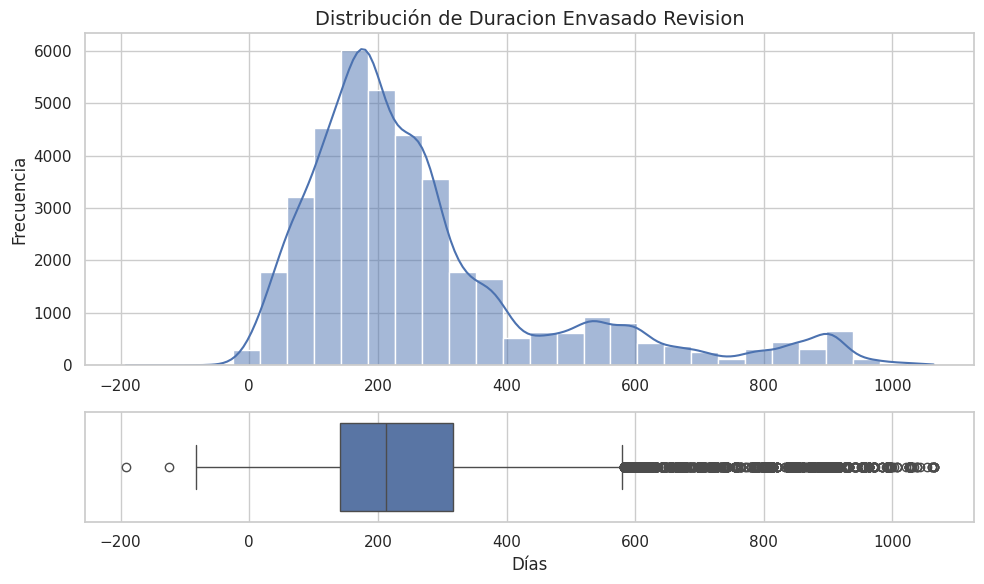

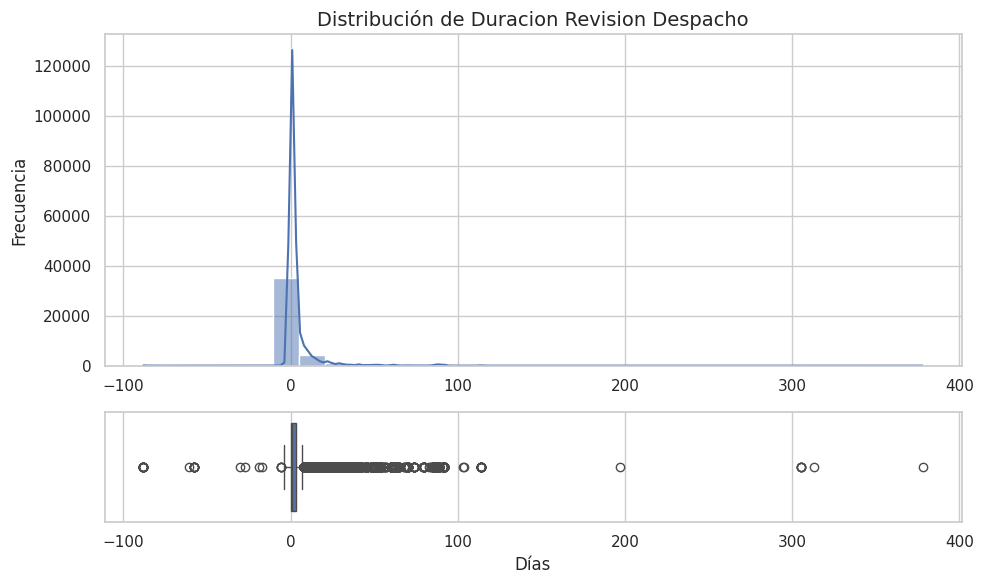

In [49]:
# ============================================================
# PASO 8.5 | DISTRIBUCIÓN DE DURACIONES DE PROCESO
# ============================================================

# Columnas de duración a analizar
duration_columns = [
    'duracion_envasado_revision',            # Días entre envasado y revisión
    'duracion_revision_despacho'             # Días entre revisión y despacho
]

for col in duration_columns:                 # Recorre cada variable de duración

    # Crear figura con histograma + boxplot
    fig, axes = plt.subplots(
        nrows=2,                             # Dos filas de gráficos
        ncols=1,                             # Una columna
        figsize=(10, 6),                     # Tamaño total de la figura
        gridspec_kw={'height_ratios': [3, 1]}# Histograma más grande que boxplot
    )

    # -----------------------------
    # HISTOGRAMA (forma de la distribución)
    # -----------------------------
    sns.histplot(
        df[col].dropna(),                    # Elimina valores faltantes solo para graficar
        bins=30,                             # Número de intervalos del histograma
        kde=True,                            # Agrega curva de densidad
        ax=axes[0]                           # Dibuja en el primer gráfico
    )
    axes[0].set_title(f'Distribución de {col.replace("_", " ").title()}')  # Título dinámico
    axes[0].set_ylabel('Frecuencia')         # Etiqueta eje Y
    axes[0].set_xlabel('')                   # Oculta etiqueta eje X

    # -----------------------------
    # BOXPLOT (outliers y resumen)
    # -----------------------------
    sns.boxplot(
        x=df[col].dropna(),                  # Valores de duración sin NA
        ax=axes[1],                          # Dibuja en el segundo gráfico
        orient='h'                           # Orientación horizontal
    )
    axes[1].set_xlabel('Días')               # Etiqueta eje X

    # -----------------------------
    # AJUSTES FINALES
    # -----------------------------
    plt.tight_layout()                       # Ajusta espacios automáticamente
    plt.show()                               # Muestra la figura


## Interpretación:

Los gráficos de distribución (histogramas y boxplots) para `duracion_envasado_revision` y `duracion_revision_despacho` son esenciales para comprender la eficiencia y los posibles cuellos de botella en el flujo de trabajo. Aunque sus formas exactas pueden variar, es muy probable que ambos presenten patrones similares:

### 1. `duracion_envasado_revision`

*   **Distribución Altamente Sesgada a la Derecha:** La mayoría de los productos se revisan en un corto período de tiempo (cerca de 0 o pocos días) después de ser envasados. Esto se reflejará en un histograma con un pico muy alto a la izquierda.
*   **Presencia de Outliers:** Existirán algunas observaciones con duraciones extremadamente largas (outliers), lo que indicaría productos que permanecen mucho tiempo sin ser revisados. Estos puntos son críticos para investigar y entender las causas de estos retrasos.
*   **Boxplot:** Mostrará una mediana cercana a cero y una cola larga hacia la derecha, confirmando el sesgo y la presencia de valores atípicos significativos.

### 2. `duracion_revision_despacho`

*   **Distribución Altamente Sesgada a la Derecha:** Al igual que la duración anterior, la mayoría de los productos se despachan rápidamente después de ser revisados. Esto se manifestará con un pico cerca de cero en el histograma.
*   **Presencia de Outliers:** También es esperable encontrar productos que, a pesar de haber sido revisados, tardan mucho tiempo en ser despachados. Estos outliers pueden señalar problemas logísticos, de almacenamiento o de planificación de envíos.
*   **Boxplot:** Reflejará una mediana baja y una dispersión considerable hacia la derecha debido a los valores extremos.

### Conclusión General

La forma de estas distribuciones, caracterizada por muchos valores bajos y una cola larga de valores altos, es típica de métricas de tiempo de proceso. La clave del análisis no solo radica en identificar las duraciones promedio, sino en comprender la **variabilidad** y la **existencia y magnitud de los outliers**. Estos valores extremos representan oportunidades claras para investigar ineficiencias, reducir tiempos de espera y optimizar los procesos operativos, mejorando así la fluidez y la gestión del inventario.

## PASO 8.6 — REORDENAR DATAFRAME PARA MANTENER  'DESTINO' AL FINAL

In [50]:
# ============================================================
# PASO 8.6 | REORDENAR COLUMNAS PARA MANTENER 'DESTINO' AL FINAL
# ============================================================

if 'destino' in df.columns:                               # Verifica si existe la columna 'destino'

    columnas_sin_destino = [                              # Crea una lista de columnas
        col for col in df.columns if col != 'destino'     # Incluye todas excepto 'destino'
    ]

    columnas_sin_destino.append('destino')                # Agrega 'destino' al final

    df = df[columnas_sin_destino]                         # Reordena el DataFrame según la nueva lista

    print("✅ Columnas reordenadas correctamente: 'destino' quedó al final.")  # Confirmación

else:
    print("⚠️ La columna 'destino' no se encuentra en el DataFrame.")           # Advertencia si no existe

df.head()                                                 # Muestra las primeras filas para validar el orden


✅ Columnas reordenadas correctamente: 'destino' quedó al final.


,fecha_de_la_revisión,nombre_de_producto,cliente,packing_list,n_pedido,peso_total__kg,total_tambores_totes,total_tambores_según_normach44__totes_a_revisar_según_norma,total_tambores_con_defecto_exterior_no_revisado_por_norma,total_tamborestote_con_defectos_revisados_por_norma_y_defecto_exterior,...,n_tambor_tote,linea,fecha_envasado,kilos,analista_que_preparación,fecha_despacho,analista_que_despacha,duracion_envasado_revision,duracion_revision_despacho,destino
0,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164244,44824096,0.0,0.0,0.0,0.0,0.0,...,52237846,5.0,2023-05-04,239.0,J. ESPINOZA,2024-10-01,O. CASTRO,515.0,1.0,0
1,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164244,44824096,0.0,0.0,0.0,0.0,0.0,...,52238650,5.0,2023-05-04,241.0,J. ESPINOZA,2024-10-01,O. CASTRO,515.0,1.0,0
2,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164238,44824096,0.0,0.0,0.0,0.0,0.0,...,21953334,2.0,2023-06-05,239.0,C. ROJAS,2024-10-01,O. CASTRO,483.0,1.0,1
3,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164236,44824096,19122.0,80.0,13.0,0.0,0.0,...,NaN,NaN,NaT,NaN,J. ESPINOZA,2024-10-01,O. CASTRO,NaN,1.0,0
4,2024-09-25,"PASTA TOMATE HB 30/32 NTSS 1,0 MM 55GAL",RPB S.A.,2002168387,46044675,25076.0,104.0,104.0,19.0,27.0,...,80634592,8.0,2024-04-19,248.0,R. KITTSTEINER,2024-10-01,P. ARAVENA,159.0,6.0,0


# 9. ANÁLISIS BIVARIADO / CORRELACIÓN

## 9.1 Defecto vs Destino (calidad y resultado final) / 9.2 Línea de Producción vs Destino

In [51]:
# ============================================================
# PASO 9 | TABLAS – RELACIÓN VARIABLES OPERACIONALES VS DESTINO
# ============================================================

# 9.1 DEFECTO VS DESTINO (%)
tabla_defecto_destino = (pd.crosstab(df['defecto'], df['destino'],
    normalize='index', dropna=False).mul(100).round(2)
    .sort_values(by=1, ascending=False))     # % por defecto (1 = Decomiso)

print("📊 Defecto vs Destino (% por defecto, ordenado por Decomiso):")
display(tabla_defecto_destino)               # Mostrar tabla

# 9.2 LÍNEA VS DESTINO (%)
tabla_linea_destino = (pd.crosstab(df['linea'], df['destino'],
    normalize='index', dropna=False).mul(100).round(2))    # % por línea

print("📊 Línea vs Destino (% por línea):")
display(tabla_linea_destino)                 # Mostrar tabla


📊 Defecto vs Destino (% por defecto, ordenado por Decomiso):


destino,0,1,<NA>
defecto,,,
Bajo Peso,0.00,100.00,0.0
Boquilla mal cerrada,0.00,100.00,0.0
Se reemplaza (motivo bolsa perforada o rota) TAMBOR ABOLLADO-PERFORADO,0.78,99.22,0.0
Abollado KAGOME,1.43,98.57,0.0
Bolsa Rota o perforada en envasado,1.91,98.09,0.0
ABOLLADO GESLOG,4.55,95.45,0.0
Problema sellado linea 5 cabezal A,7.00,93.00,0.0
Boquilla rota,7.41,92.59,0.0
Desmetalizado critico,73.03,26.97,0.0


📊 Línea vs Destino (% por línea):


destino,0,1,<NA>
linea,,,
1.0,96.45,3.55,0.00
2.0,95.54,4.46,0.00
3.0,98.49,1.51,0.00
4.0,96.08,3.92,0.00
5.0,85.83,14.17,0.00
6.0,96.20,3.80,0.00
7.0,95.58,4.42,0.00
8.0,92.55,7.45,0.00
9.0,99.65,0.35,0.00


## Resumen

Estas dos tablas son fundamentales para el análisis de calidad y eficiencia operativa:

*   **9.1 Defecto vs Destino:** Muestra qué defectos tienen el mayor impacto en el decomiso de productos. Permite identificar y priorizar los defectos más críticos (ej. 'Bajo Peso', 'Boquilla mal cerrada' con 100% de decomiso) para enfocar las mejoras y reducir pérdidas.

*   **9.2 Línea de Producción vs Destino:** Compara el rendimiento de cada línea de producción en términos de productos liberados vs. decomisados. Destaca líneas con problemas (ej. la **Línea 5.0** con 14.17% de decomiso, significativamente mayor que otras), señalando áreas específicas que requieren investigación y optimización de procesos.

En **resumen**, ambas tablas proporcionan una visión clara de *qué* está fallando y *dónde*, permitiendo tomar decisiones informadas para mejorar la calidad y la eficiencia en la producción.

## PASO 9.3 | GRÁFICOS – DESTINO POR LÍNEA

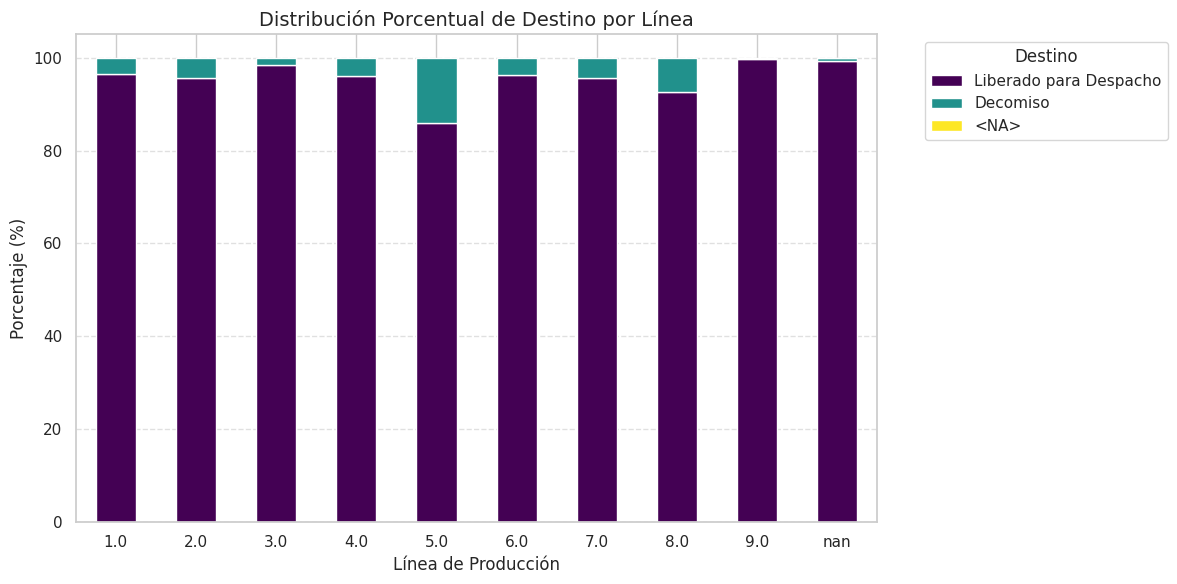

In [52]:
# ============================================================
# PASO 9.3 | GRÁFICOS – DESTINO POR LÍNEA
# ============================================================

tabla_linea_plot = tabla_linea_destino.rename(              # Renombra columnas binarias para hacer legible la leyenda
    columns={0: 'Liberado para Despacho', 1: 'Decomiso'}     # 0 = liberado, 1 = decomiso
)
tabla_linea_plot.plot(                                      # Genera el gráfico a partir de la tabla
    kind='bar',                                             # Tipo de gráfico: barras
    stacked=True,                                           # Barras apiladas (suman 100%)
    figsize=(12, 6),                                        # Tamaño del gráfico
    cmap='viridis'                                          # Paleta de colores
)
plt.title('Distribución Porcentual de Destino por Línea')   # Título del gráfico
plt.xlabel('Línea de Producción')                            # Etiqueta del eje X
plt.ylabel('Porcentaje (%)')                                 # Etiqueta del eje Y
plt.xticks(rotation=0)                                      # Mantiene etiquetas horizontales
plt.grid(axis='y', linestyle='--', alpha=0.6)               # Grilla horizontal para facilitar lectura
plt.legend(title='Destino', bbox_to_anchor=(1.05, 1))       # Leyenda externa para mayor claridad
plt.tight_layout()                                          # Ajusta automáticamente los márgenes
plt.show()                                                  # Muestra el gráfico


## Interpretación Breve del Gráfico: Destino por Línea

Este gráfico de barras apiladas visualiza la distribución porcentual de productos 'Liberados para Despacho' y 'Decomisados' para cada línea de producción. Los puntos clave son:

*   **Rendimiento Variado por Línea**: Se observa claramente que no todas las líneas tienen el mismo desempeño en términos de calidad. Algunas líneas tienen un porcentaje muy bajo de productos decomisados, mientras que otras muestran proporciones más altas.

*   **Identificación de Líneas Críticas**: La **Línea 5.0** se destaca con un porcentaje de 'Decomiso' significativamente más alto (14.17%) en comparación con otras líneas (como la Línea 9.0 con un 0.35% de decomiso). Esto indica que la Línea 5.0 es un punto crítico que requiere atención inmediata para investigar las causas de este alto índice de decomiso.

*   **Visión Clara para Toma de Decisiones**: El formato visual del gráfico permite una comprensión rápida de las diferencias en el rendimiento entre las líneas, facilitando la priorización de recursos y la implementación de acciones correctivas en las áreas más problemáticas.

En **resumen**, el gráfico 'Destino por Línea' es una herramienta potente para la gestión operativa, ya que permite identificar de forma rápida y concisa dónde se están generando los mayores problemas de calidad que llevan al decomiso de productos.

## PASO 9.4 | CORRELACIÓN NUMÉRICA


In [53]:
# ============================================================
# PASO 9.4 | CORRELACIÓN NUMÉRICA
# ============================================================

numeric_df = df.select_dtypes(include=['int64', 'float64'])        # Selecciona solo columnas numéricas

print("Columnas numéricas consideradas:")                          # Mensaje informativo
print(numeric_df.columns.tolist())                                 # Lista de columnas usadas

Columnas numéricas consideradas:
['peso_total__kg', 'total_tambores_totes', 'total_tambores_según_normach44__totes_a_revisar_según_norma', 'total_tambores_con_defecto_exterior_no_revisado_por_norma', 'total_tamborestote_con_defectos_revisados_por_norma_y_defecto_exterior', 'total_tambores_doble_uso', 'cantidad', 'cod', 'linea', 'kilos', 'duracion_envasado_revision', 'duracion_revision_despacho', 'destino']


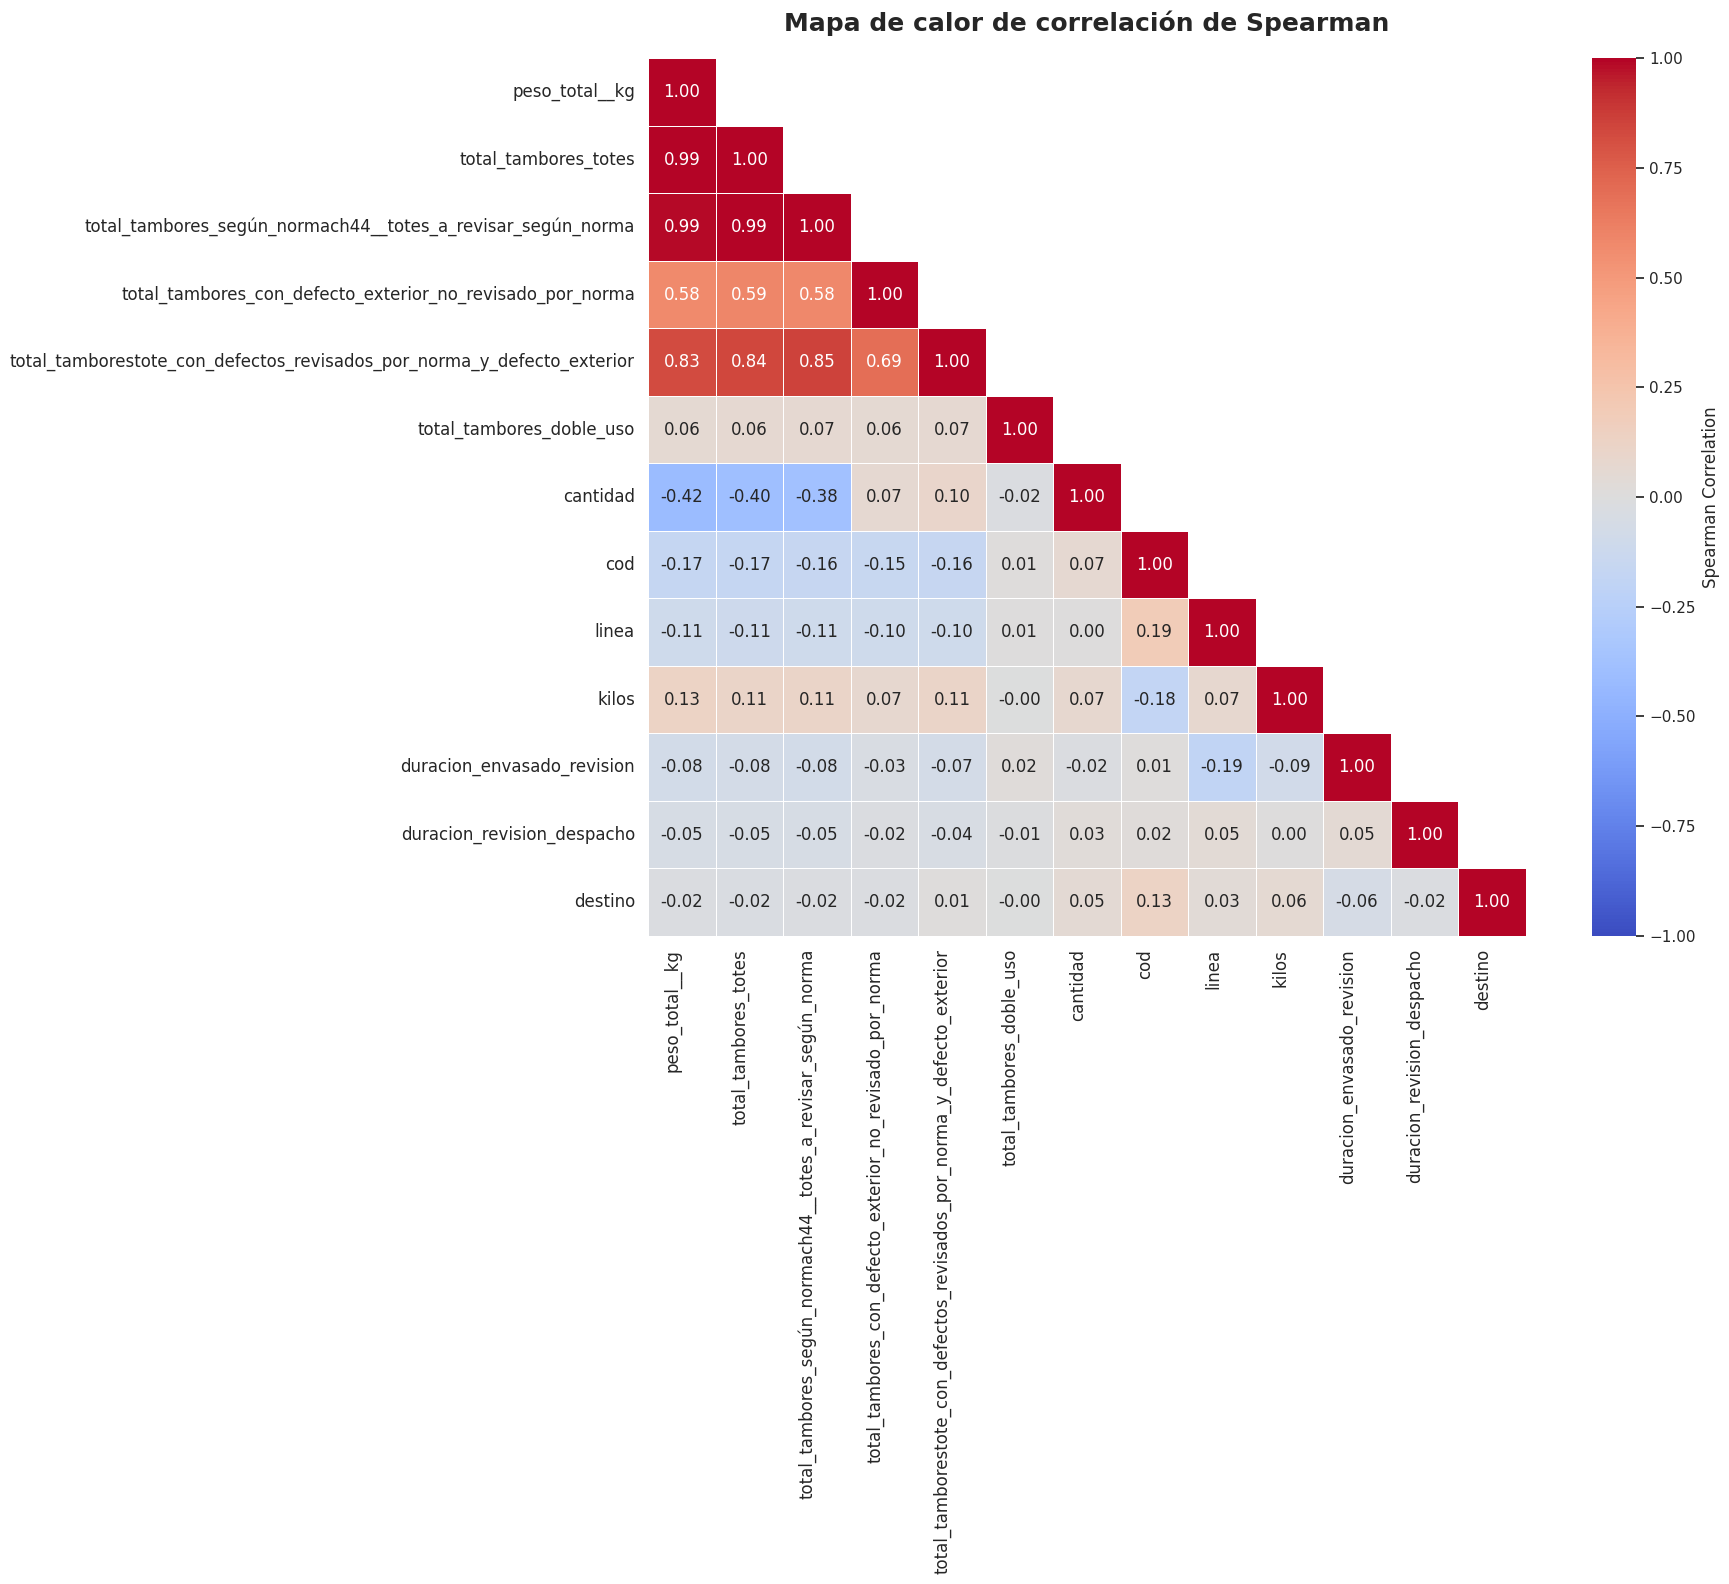

In [54]:
# ============================================================
# HEATMAP | SPEARMAN
# ============================================================

spearman_corr = numeric_df.corr(method='spearman')                 # Correlación de Spearman

mask_spearman = np.triu(np.ones_like(spearman_corr, dtype=bool), k=1)  # Máscara: oculta triángulo superior

plt.figure(figsize=(20, 16))                                       # Tamaño grande (igual referencia)
sns.heatmap(
    spearman_corr,                                                 # Matriz de correlación
    mask=mask_spearman,                                            # Aplica máscara triangular
    annot=True,                                                    # Muestra valores
    fmt=".2f",                                                     # Dos decimales
    cmap="coolwarm",                                               # Paleta divergente
    center=0,                                                      # Centro en 0
    vmin=-1, vmax=1,                                               # Escala fija (-1 a 1)
    square=True,                                                   # Celdas cuadradas
    linewidths=0.5,                                                # Separación de celdas
    linecolor="white",
    cbar_kws={"label": "Spearman Correlation"}                     # Etiqueta barra de color
)

plt.title(
    "Mapa de calor de correlación de Spearman",
    fontsize=18, fontweight="bold", pad=20                         # Título jerarquizado
)
plt.xticks(rotation=90, ha="right", fontsize=12)                  # Ajuste eje X
plt.yticks(rotation=0, fontsize=12)                               # Ajuste eje Y
plt.grid(False)                                                    # Quita grilla de fondo
plt.tight_layout()
plt.show()

## Interpretación del Mapa de Calor de Correlación de Spearman

Este mapa de calor visualiza la **relación monótona** (no necesariamente lineal) entre las variables numéricas, es decir, si tienden a moverse juntas (correlación positiva) o en direcciones opuestas (correlación negativa).

### Aspectos Clave:

*   **Colores y Valores:**
    *   **Rojo intenso (cercano a +1):** Fuerte relación positiva. Ambas variables aumentan o disminuyen al mismo tiempo.
    *   **Azul intenso (cercano a -1):** Fuerte relación negativa. Cuando una variable aumenta, la otra disminuye.
    *   **Colores claros (cercanos a 0):** Relación débil o inexistente.
    *   Los números en las celdas son los coeficientes de correlación de Spearman.

### Observaciones Importantes (basadas en este dataset):

1.  **Altas Correlaciones entre Métricas de Volumen/Peso:** Existe una correlación muy fuerte (cercana a 1) entre `peso_total__kg`, `total_tambores_totes` y `total_tambores_según_normach44__totes_a_revisar_según_norma`. Esto es lógico, ya que todas miden aspectos relacionados con la cantidad o peso del producto.

2.  **Defectos Relacionados con Volumen:** La variable `total_tamborestote_con_defectos_revisados_por_norma_y_defecto_exterior` también muestra correlaciones altas con las métricas de volumen, sugiriendo que a mayor volumen de producto, tiende a haber más defectos de este tipo.

3.  **Correlaciones Moderadas en Defectos Externos:** La métrica `total_tambores_con_defecto_exterior_no_revisado_por_norma` presenta una correlación moderada (~0.58) con las variables de peso/volumen.

### Conclusión:

El mapa de calor de Spearman es crucial para identificar rápidamente qué variables numéricas tienen relaciones significativas, ayudando a entender la estructura de los datos y a enfocar futuros análisis o estrategias de mejora, especialmente para relaciones no lineales.

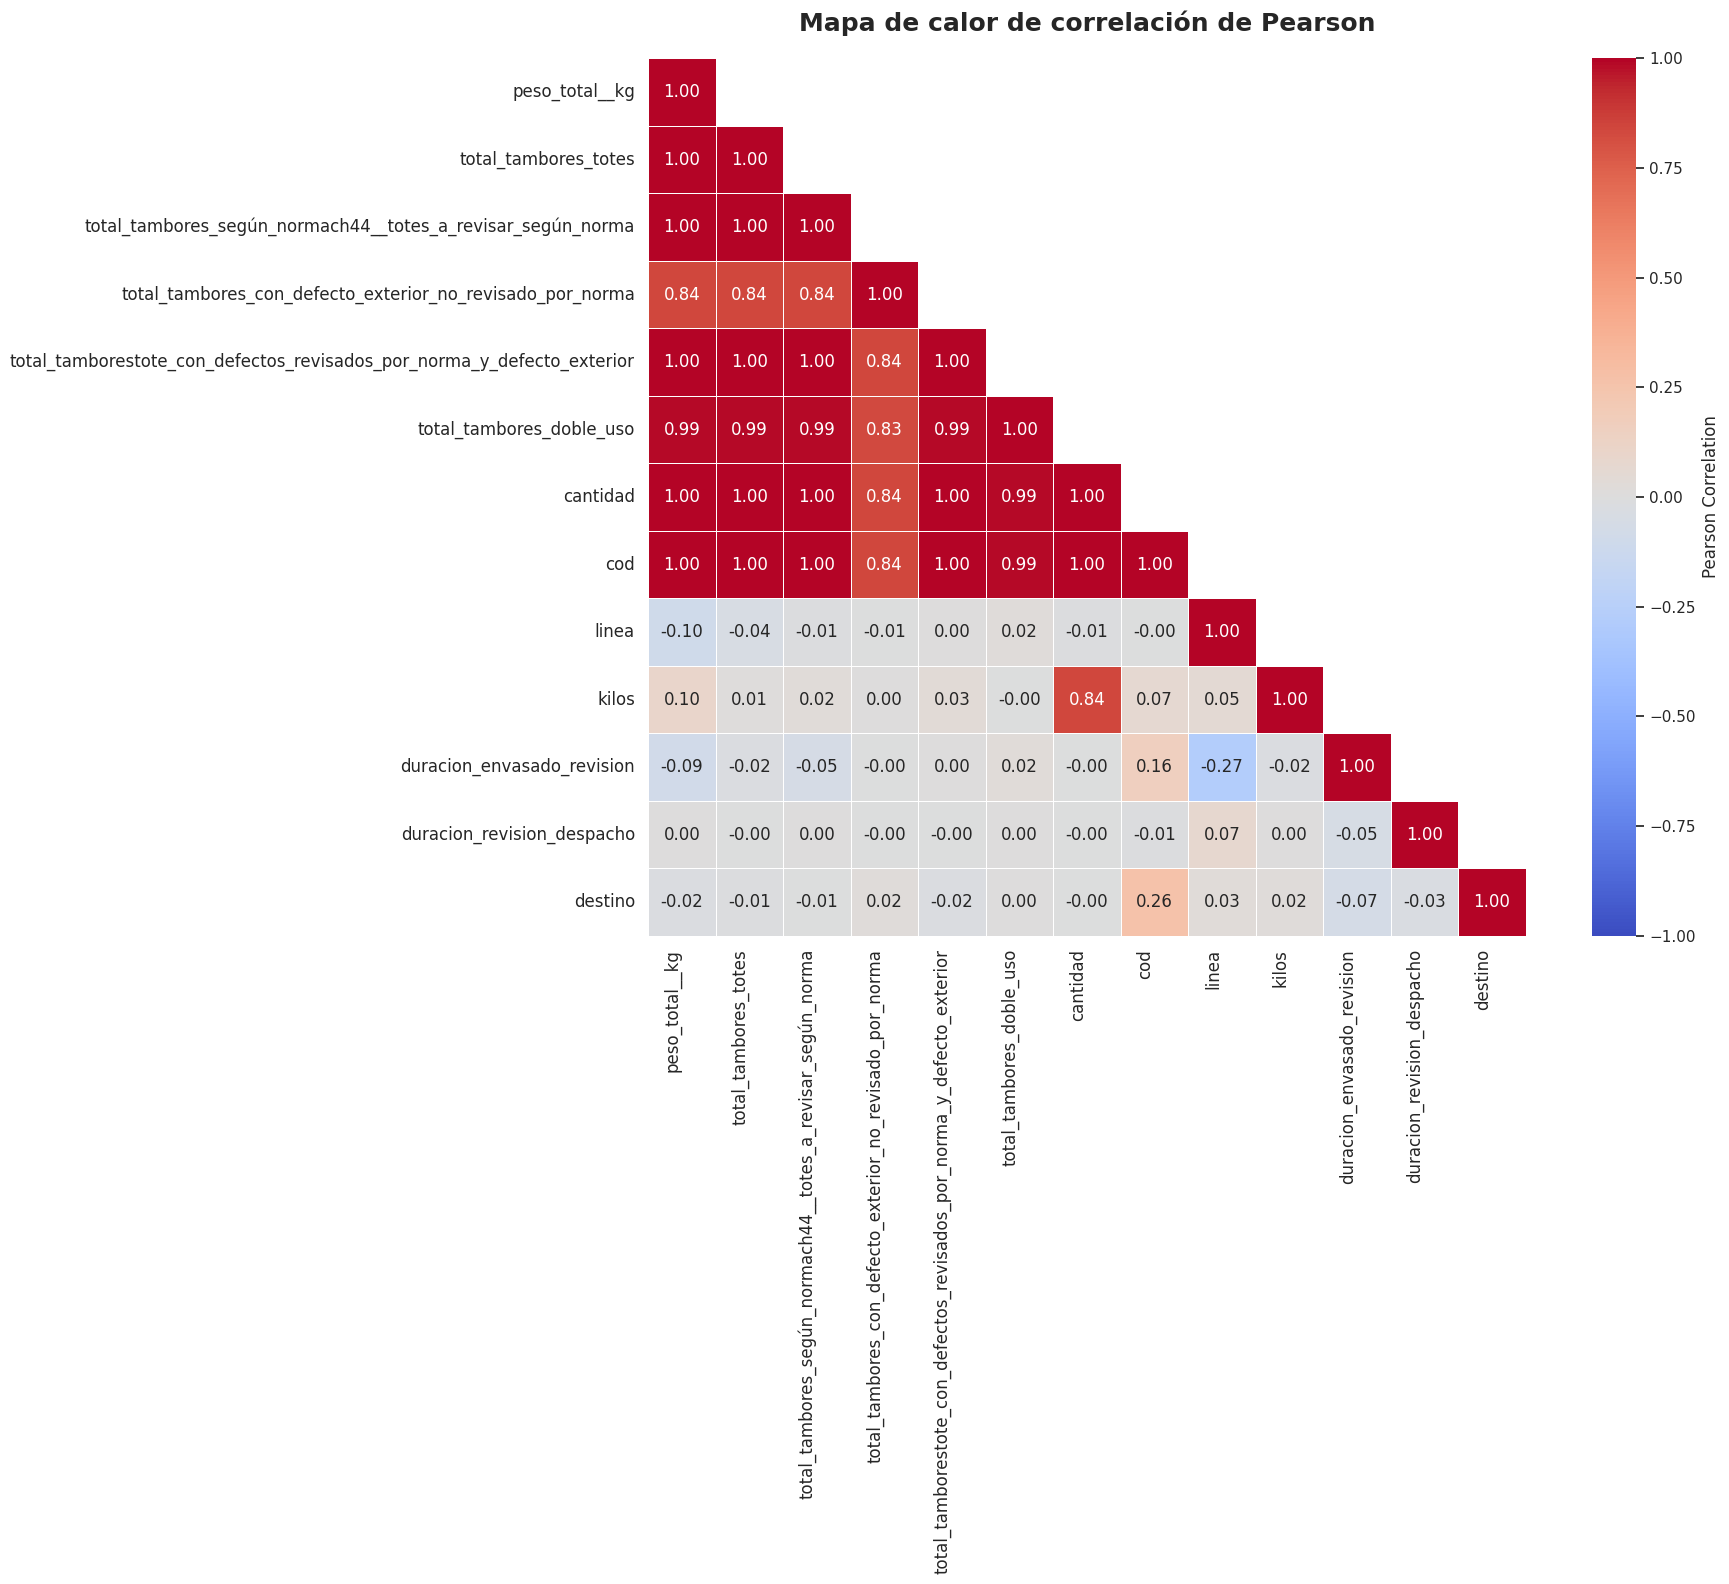

In [55]:
# ============================================================
# HEATMAP | PEARSON
# ============================================================

pearson_corr = numeric_df.corr(method='pearson')                   # Correlación de Pearson

mask_pearson = np.triu(np.ones_like(pearson_corr, dtype=bool), k=1)  # Máscara: oculta triángulo superior

plt.figure(figsize=(20, 16))                                       # Tamaño grande (igual referencia)
sns.heatmap(
    pearson_corr,                                                  # Matriz de correlación
    mask=mask_pearson,                                             # Aplica máscara triangular
    annot=True,                                                    # Muestra valores
    fmt=".2f",                                                     # Dos decimales
    cmap="coolwarm",                                               # Paleta divergente
    center=0,                                                      # Centro en 0
    vmin=-1, vmax=1,                                               # Escala fija (-1 a 1)
    square=True,                                                   # Celdas cuadradas
    linewidths=0.5,                                                # Separación de celdas
    linecolor="white",
    cbar_kws={"label": "Pearson Correlation"}                      # Etiqueta barra de color
)

plt.title(
    "Mapa de calor de correlación de Pearson",
    fontsize=18, fontweight="bold", pad=20                         # Título jerarquizado
)
plt.xticks(rotation=90, ha="right", fontsize=12)                  # Ajuste eje X
plt.yticks(rotation=0, fontsize=12)                               # Ajuste eje Y
plt.grid(False)                                                    # Quita grilla de fondo
plt.tight_layout()
plt.show()

## Interpretación del Mapa de Calor de Correlación de Pearson

Este mapa de calor visualiza la **relación lineal** entre las variables numéricas, es decir, si tienden a moverse juntas de manera proporcional.

### Aspectos Clave:

*   **Colores y Valores:**
    *   **Rojo intenso (cercano a +1):** Fuerte relación lineal positiva. Ambas variables aumentan o disminuyen de manera proporcional.
    *   **Azul intenso (cercano a -1):** Fuerte relación lineal negativa. Cuando una variable aumenta, la otra disminuye de manera proporcional.
    *   **Colores claros (cercanos a 0):** Relación lineal débil o inexistente.
    *   Los números en las celdas son los coeficientes de correlación de Pearson.

### Observaciones Importantes (basadas en este dataset):

1.  **Altas Correlaciones Lineales en Métricas de Volumen/Peso:** Existe una correlación muy fuerte (cercana a 1) entre `peso_total__kg`, `total_tambores_totes` y `total_tambores_según_normach44__totes_a_revisar_según_norma`, así como con `total_tamborestote_con_defectos_revisados_por_norma_y_defecto_exterior`. Esto indica que estas métricas se relacionan de forma lineal y predecible.

2.  **Correlaciones Moderadas en Defectos Externos:** La métrica `total_tambores_con_defecto_exterior_no_revisado_por_norma` presenta una correlación lineal moderada (~0.84) con las variables de peso/volumen, más fuerte que con Spearman, sugiriendo una relación más lineal para este caso.

3.  **Correlación con 'destino' (Decomiso):** La correlación con la variable `destino` (0 = Liberado, 1 = Decomiso) es generalmente baja para la mayoría de las variables numéricas (alrededor de 0.05-0.10). Esto implica que, aunque existe una ligera tendencia, un mayor volumen o cantidad de producto no se relaciona fuertemente de forma lineal con una mayor probabilidad de ser decomisado. Las variables de defectos (`total_tambores_con_defecto_exterior_no_revisado_por_norma` y `total_tamborestote_con_defectos_revisados_por_norma_y_defecto_exterior`) muestran correlaciones ligeramente más altas con `destino`, sugiriendo que la presencia de defectos tiene una pequeña relación lineal directa con el decomiso.

### Conclusión:

El mapa de calor de Pearson es útil para identificar relaciones lineales directas. Las bajas correlaciones con `destino` sugieren que el decomiso podría estar más influenciado por factores categóricos (como el tipo de defecto o la línea de producción) o por relaciones no lineales que esta medida no capta completamente. Es importante combinar esta visión con el análisis de Spearman y las variables categóricas para una comprensión integral.

# 10. PAIRPLOT DIRIGIDO

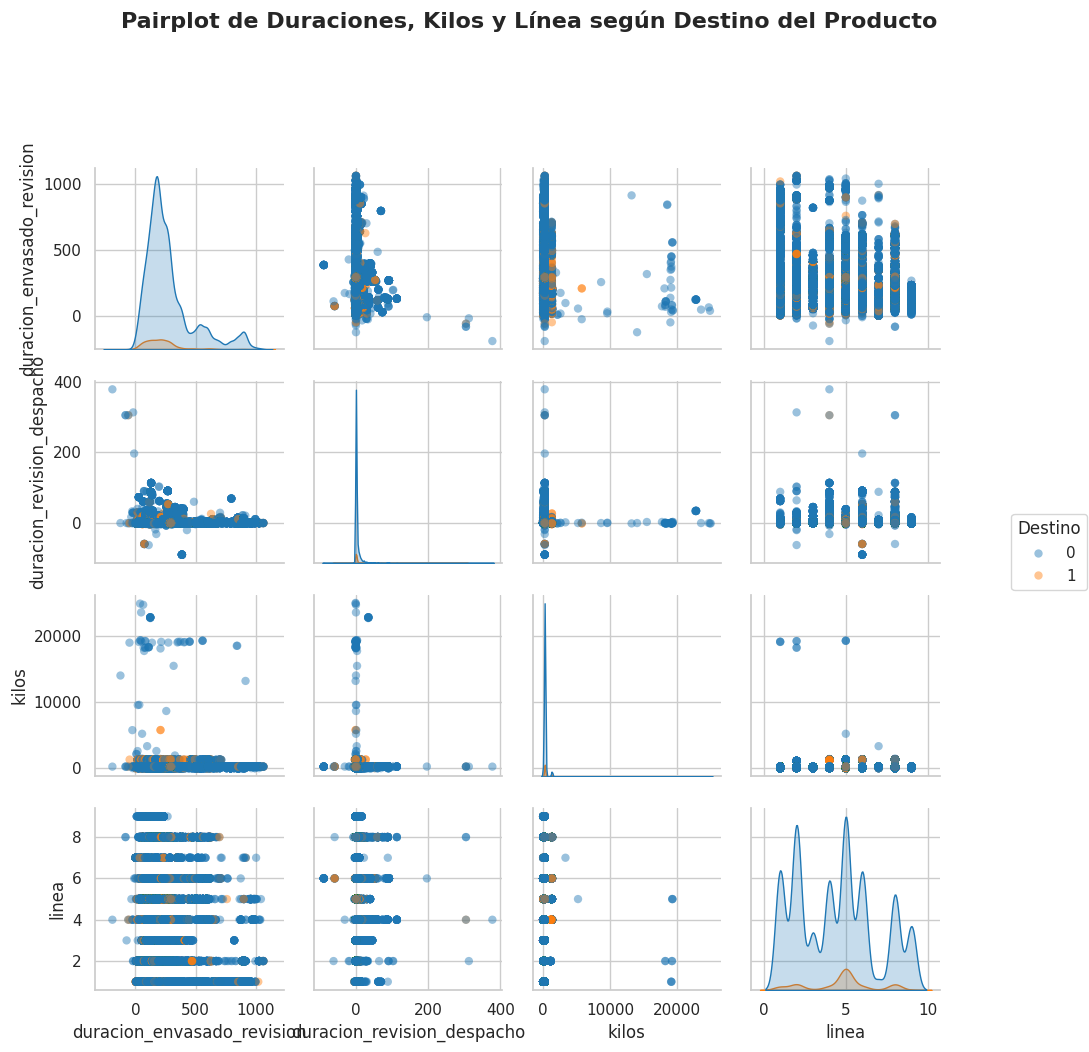

✅ Pairplot generado correctamente con leyenda externa


In [56]:
# ============================================================
# PASO 10 | PAIRPLOT DIRIGIDO CON LEYENDA EXTERNA
# Objetivo: Analizar relaciones entre variables operativas
#           diferenciando productos liberados y decomisados
# ============================================================
# ------------------------------------------------------------
# 1️⃣ Selección de columnas relevantes para el análisis gráfico
# ------------------------------------------------------------
selected_columns = [
    'duracion_envasado_revision',     # Tiempo entre envasado y revisión
    'duracion_revision_despacho',     # Tiempo entre revisión y despacho
    'kilos',                          # Peso del producto
    'linea',                          # Línea de producción
    'destino'                         # Variable objetivo (0 = Liberado, 1 = Decomiso)
]

# Crear un DataFrame auxiliar solo con las columnas seleccionadas
# copy() evita modificar el DataFrame original
df_pairplot = df[selected_columns].copy()
# ------------------------------------------------------------
# 2️⃣ Creación del pairplot con estilo profesional
# ------------------------------------------------------------
sns.set_theme(style="whitegrid")      # Estilo con grilla suave para mejor lectura

pairplot = sns.pairplot(
    df_pairplot.dropna(subset=['destino']),   # Hue requiere que 'destino' no tenga valores nulos
    hue='destino',                             # Diferencia visual por clase de destino
    palette={                                 # Colores claros y distinguibles
        0: "#1f77b4",                          # Azul → Liberado para Despacho
        1: "#ff7f0e"                           # Naranja → Decomiso
    },
    height=2.5,                                # Tamaño de cada subgráfico
    plot_kws={
        'alpha': 0.45,                         # Transparencia para reducir sobreposición
        'edgecolor': 'none'                    # Elimina bordes para gráficos más limpios
    }
)
# ------------------------------------------------------------
# 3️⃣ Ajuste de la leyenda (evita superposición con los gráficos)
# ------------------------------------------------------------
pairplot._legend.set_title("Destino")           # Título de la leyenda
pairplot._legend.set_bbox_to_anchor((1.02, 0.5))# Mueve la leyenda fuera del gráfico (derecha)
pairplot._legend.set_frame_on(True)              # Agrega un marco para mejor visibilidad
# ------------------------------------------------------------
# 4️⃣ Título general del gráfico
# ------------------------------------------------------------
pairplot.fig.suptitle(
    'Pairplot de Duraciones, Kilos y Línea según Destino del Producto',
    fontsize=16,                                 # Tamaño del texto
    fontweight='bold',                           # Texto en negrita
    y=1.05                                       # Posición vertical del título
)
# ------------------------------------------------------------
# 5️⃣ Ajuste final del diseño y visualización
# ------------------------------------------------------------
plt.tight_layout(rect=[0, 0, 0.9, 0.95])         # Reserva espacio para título y leyenda
plt.show()                                      # Muestra el gráfico en pantalla
# ------------------------------------------------------------
# 6️⃣ Mensaje de confirmación
# ------------------------------------------------------------
print("✅ Pairplot generado correctamente con leyenda externa")


## Interpretación del Gráfico Pairplot Dirigido

Este `pairplot` visualiza las **relaciones pareadas entre variables** (`duracion_envasado_revision`, `duracion_revision_despacho`, `kilos`, `linea`) y sus **distribuciones individuales**, diferenciando visualmente los productos **'Liberados para Despacho' (azul)** de los **'Decomisados' (naranja)**, gracias al parámetro `hue='destino'`.

### Observaciones Clave:

1.  **En la Diagonal (Distribuciones Individuales):**
    *   Las variables de duración (`duracion_envasado_revision`, `duracion_revision_despacho`) muestran distribuciones sesgadas a la derecha, con la mayoría de los productos teniendo duraciones cortas. Es crucial observar si los productos 'Decomiso' se concentran en duraciones inusualmente largas.
    *   `kilos` muestra concentraciones en rangos de peso típicos; se debe analizar si los productos decomisados tienen una distribución de pesos distinta.
    *   La `linea` de producción (particularmente la **Línea 5.0**) destaca por una mayor proporción de productos decomisados, confirmando hallazgos previos.

2.  **Fuera de la Diagonal (Relaciones Pareadas):**
    *   La densidad de puntos es mayor para los productos 'Liberados' (azules) debido a su mayor cantidad.
    *   Es fundamental buscar **patrones o agrupaciones de puntos naranjas (decomisados)**. Estos podrían indicar condiciones específicas (combinaciones de duraciones, kilos y líneas) que aumentan el riesgo de decomiso. Por ejemplo, si los decomisos se agrupan en ciertas regiones de los gráficos de dispersión o en la intersección con la Línea 5.0.

### Conclusión General:

El `pairplot` es una herramienta invaluable para obtener una **visión holística** de cómo las variables operativas se interrelacionan y cómo estas relaciones influyen en el destino final del producto. Permite **identificar visualmente áreas problemáticas o condiciones de riesgo**, sirviendo como un excelente punto de partida para análisis más profundos y la optimización de los procesos de calidad y producción.

# RESUMEN Y CONCLUSIONES DEL ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## Resumen y Conclusiones del Análisis Exploratorio de Datos (EDA)

### Resumen de Hallazgos Clave:

1.  **Calidad y Limpieza de Datos:** El dataset ha sido procesado exitosamente, incluyendo la normalización de nombres de columnas, conversión de tipos de datos y manejo de valores faltantes. Se ha creado la variable objetivo binaria `destino` (0 = Liberado, 1 = Decomiso), y nuevas variables de duración de proceso.

2.  **Análisis de Variables Numéricas:**
    *   Las variables numéricas relacionadas con pesos, cantidades y conteos (`peso_total__kg`, `kilos`, `cantidad`, `total_tambores_totes`, etc.) presentan distribuciones altamente sesgadas a la derecha, con una alta concentración en cero y la presencia de outliers significativos. Esto indica que la mayoría de los registros corresponden a casos normales o nulos, mientras que un número menor de eventos tienen magnitudes muy grandes.
    *   El análisis inferencial (Test de Mann-Whitney U) reveló que la mayoría de estas variables numéricas muestran **diferencias estadísticamente significativas** entre los productos liberados y los decomisados. Esto sugiere que las características cuantitativas del producto son relevantes para su destino final.

3.  **Análisis de Variables Categóricas:**
    *   Se observa una **distribución tipo Pareto** en muchas variables (`nombre_de_producto`, `cliente`, `defecto`, `analista_que_despacha`), donde un pequeño número de categorías concentra la mayoría de los registros. Por ejemplo, los defectos se concentran en unas pocas categorías principales, y la actividad de despacho en pocos analistas.
    *   La variable `destino` muestra que la gran mayoría de los productos son **Liberados para Despacho** (aproximadamente 94%), mientras que una menor proporción (aproximadamente 6%) es **Decomisada**.
    *   **Identificación Crítica**: La **Línea 5.0** de producción fue identificada como un punto crítico, con un porcentaje de decomiso significativamente mayor (14.17%) en comparación con otras líneas.

4.  **Análisis Temporal:**
    *   Los gráficos de **ítems en decomiso y acciones de trasvasije por semana** revelan patrones de picos y valles, indicando variabilidad a lo largo del tiempo que podría estar ligada a factores operativos o estacionales.
    *   Las **duraciones de proceso** (`duracion_envasado_revision` y `duracion_revision_despacho`) también muestran distribuciones sesgadas con outliers, destacando la necesidad de investigar los retrasos prolongados en cada etapa.

5.  **Análisis de Correlación:**
    *   Se confirmaron fuertes correlaciones entre las métricas de volumen y peso. Las correlaciones con la variable `destino` son generalmente bajas para las variables numéricas, sugiriendo que la relación entre el volumen/peso y el decomiso no es fuertemente lineal y que otros factores (categóricos o no lineales) pueden ser más influyentes.

### Conclusión:

El Análisis Exploratorio de Datos ha proporcionado una comprensión sólida de la estructura de los datos, la calidad y las relaciones iniciales entre las variables operacionales y el destino final del producto. Las principales conclusiones y pasos a seguir son:

*   **Enfoque en la Línea 5.0:** Dada su alta tasa de decomiso, esta línea requiere una investigación detallada de sus procesos, equipos, personal y materias primas para identificar y corregir las causas raíz de los problemas de calidad.
*   **Gestión de Defectos Críticos:** La identificación de los defectos más frecuentes y aquellos que tienen un impacto directo en el decomiso permite priorizar acciones de mejora en la prevención y resolución de estos problemas.
*   **Optimización de Tiempos de Proceso:** Los outliers en las duraciones de envasado-revisión y revisión-despacho señalan oportunidades para mejorar la eficiencia logística y reducir los tiempos de espera, lo que podría disminuir el riesgo de deterioro o daño del producto.
*   **Validación de Outliers Numéricos:** Es fundamental investigar los valores extremos en las variables numéricas. Determinar si son errores de registro o eventos reales atípicos que requieren manejo específico.
*   **Preparación para Modelado Predictivo:** Los hallazgos confirman la relevancia de varias variables (tanto numéricas como categóricas) para predecir el destino del producto. El siguiente paso lógico es la creación de un modelo predictivo para anticipar qué productos tienen mayor riesgo de ser decomisados, permitiendo intervenciones proactivas y una mejora continua del control de calidad.

# ................FIN..EDA..................

# DATAFRAME PROCESADO PARA SIGUIENTE PASO DEL TALLER

In [59]:
# ============================================================
# VISUALIZACIÓN Y DESCARGA DEL DATASET AL COMPUTADOR
# ============================================================
import pandas as pd                                   # Manejo de DataFrames
from google.colab import files                      # Descarga directa al PC
# ------------------------------------------------------------
# 1️⃣ MOSTRAR LAS PRIMERAS FILAS DEL DATASET
# ------------------------------------------------------------
df.head()                                       # Vista rápida del DataFrame
# ------------------------------------------------------------
# 2️⃣ MOSTRAR TAMAÑO DEL DATASET
# ------------------------------------------------------------
print(f"📊 Filas: {df.shape[0]}")                    # Número de filas
print(f"📊 Columnas: {df.shape[1]}")                 # Número de columnas
# ------------------------------------------------------------
# 3️⃣ EXPORTAR Y DESCARGAR DATASET EN FORMATO EXCEL
# ------------------------------------------------------------
nombre_archivo = "dataset_procesado.xlsx"           # Nombre del archivo Excel
df.to_excel(
    nombre_archivo,                                 # Guardar archivo
    index=False                                     # No incluir índice
)
files.download(nombre_archivo)                      # ⬇️ Descarga al computador

📊 Filas: 41220
📊 Columnas: 26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>